# Artificial Intelligence Model for Parkinson Disease Detection Using Machine Learning Algorithms

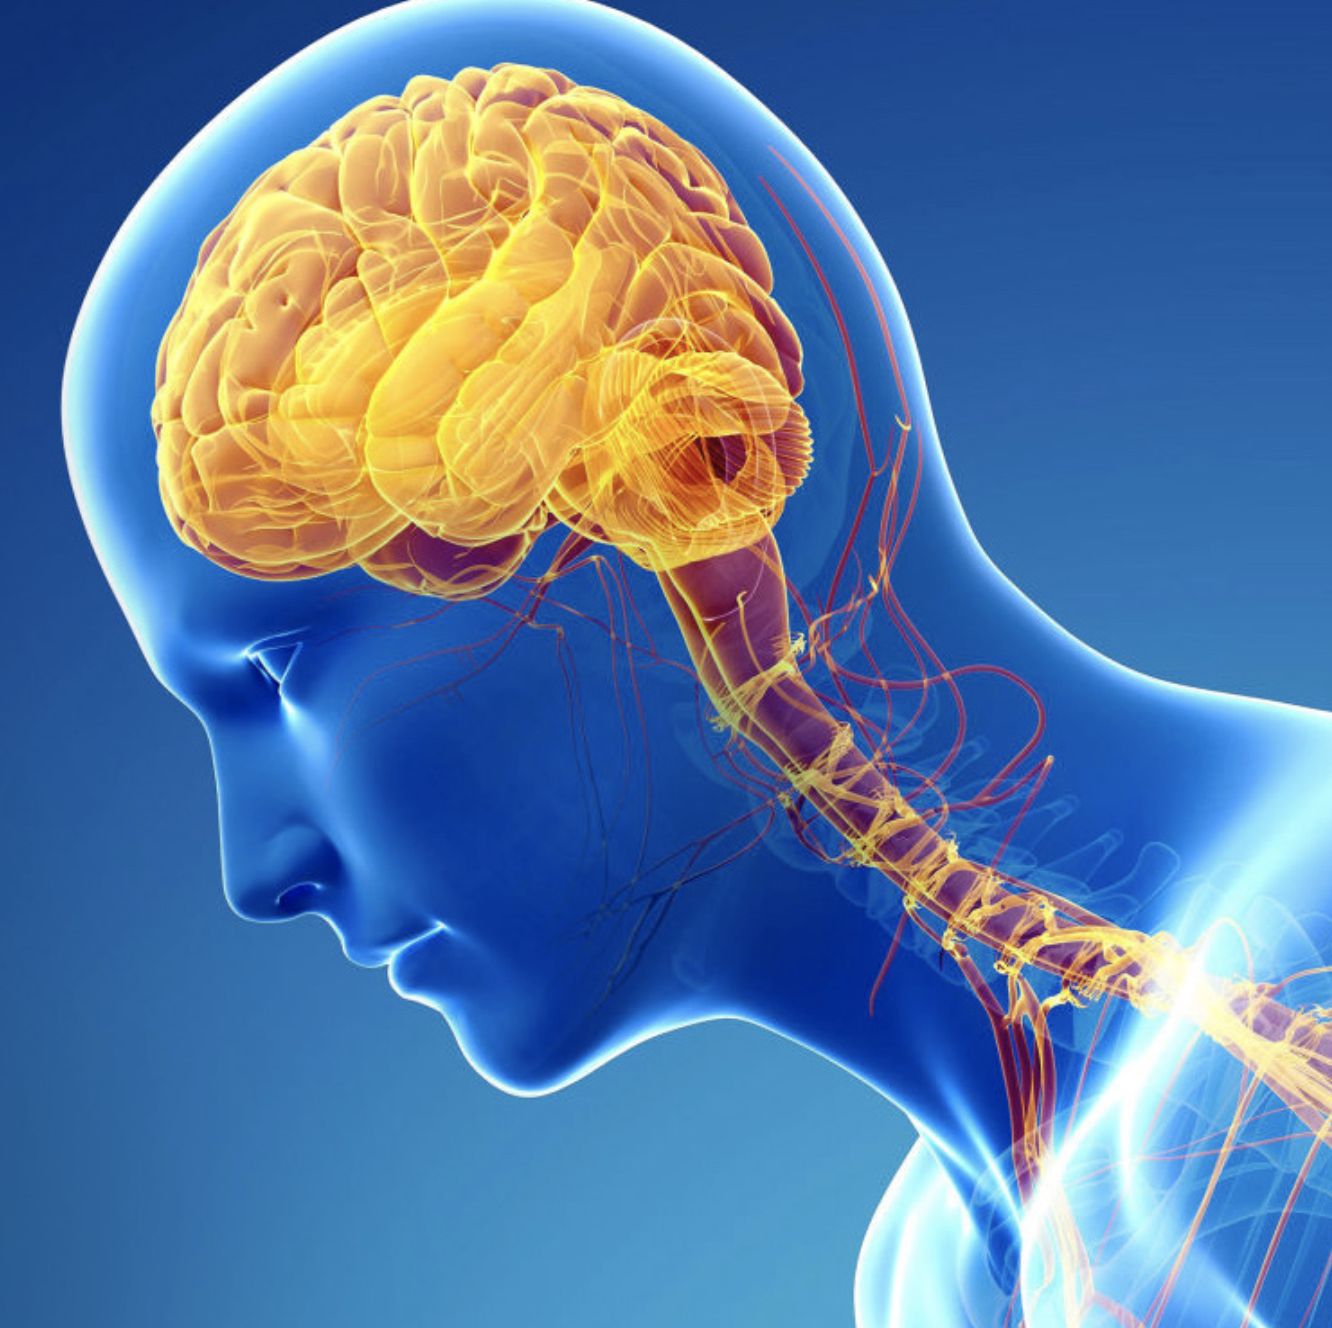


#### Parkinson's disease is a brain disorder that leads to shaking, stiffness, and difficulty with walking, balance, and coordination. Parkinson's symptoms usually begin gradually and get worse over time. As the disease progresses, people may have difficulty walking and talking.


Parkinsons can affect the patient's vocal organs in the similar way it affects limbs and hands so just by monitoring the vocal cords in the larynx (vocal box), we are now able to detect if the person has/is developing Parkinsons or not.


### Built-in packages


In [360]:
import warnings
import re
warnings.filterwarnings("ignore")

### Third party packages


In [361]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
import matplotlib.pyplot as plt

### Read the CSV file and display first 5 rows


In [463]:
df = pd.read_csv("parkinsons.csv")

df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

### Changing Column names for better readability

In [363]:
df.columns = [i.replace(" ", "_").replace("(%)", "_percentage").replace("(dB)", "_db").replace(":", "_").lower() for i in df.columns]
df.columns = [re.sub(r"\((.+)\)", "", i) for i in df.columns]

df.head()

name  mdvp_fo  mdvp_fhi  mdvp_flo  mdvp_jitter_percentage  \
0  phon_R01_S01_1  119.992   157.302    74.997                 0.00784   
1  phon_R01_S01_2  122.400   148.650   113.819                 0.00968   
2  phon_R01_S01_3  116.682   131.111   111.555                 0.01050   
3  phon_R01_S01_4  116.676   137.871   111.366                 0.00997   
4  phon_R01_S01_5  116.014   141.781   110.655                 0.01284   

   mdvp_jitter  mdvp_rap  mdvp_ppq  jitter_ddp  mdvp_shimmer  ...  \
0      0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1      0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2      0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3      0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4      0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   shimmer_dda      nhr     hnr  status      rpde       dfa   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        d2       ppe  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

### Checking The shape of the Data

In [364]:
print(f"The shape of the DataFrame is: {df.shape}, which means there are {df.shape[0]} rows and {df.shape[1]} columns.")

The shape of the DataFrame is: (195, 24), which means there are 195 rows and 24 columns.


# Cheking Information of data

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    195 non-null    object 
 1   mdvp_fo                 195 non-null    float64
 2   mdvp_fhi                195 non-null    float64
 3   mdvp_flo                195 non-null    float64
 4   mdvp_jitter_percentage  195 non-null    float64
 5   mdvp_jitter             195 non-null    float64
 6   mdvp_rap                195 non-null    float64
 7   mdvp_ppq                195 non-null    float64
 8   jitter_ddp              195 non-null    float64
 9   mdvp_shimmer            195 non-null    float64
 10  mdvp_shimmer_db         195 non-null    float64
 11  shimmer_apq3            195 non-null    float64
 12  shimmer_apq5            195 non-null    float64
 13  mdvp_apq                195 non-null    float64
 14  shimmer_dda             195 non-null    fl

### Check if any of the columns have null values


In [366]:
print(df.isnull().sum())

name                      0
mdvp_fo                   0
mdvp_fhi                  0
mdvp_flo                  0
mdvp_jitter_percentage    0
mdvp_jitter               0
mdvp_rap                  0
mdvp_ppq                  0
jitter_ddp                0
mdvp_shimmer              0
mdvp_shimmer_db           0
shimmer_apq3              0
shimmer_apq5              0
mdvp_apq                  0
shimmer_dda               0
nhr                       0
hnr                       0
status                    0
rpde                      0
dfa                       0
spread1                   0
spread2                   0
d2                        0
ppe                       0
dtype: int64


### Five Number Summary of data

In [367]:
df_summary = df.describe()
df_summary

mdvp_fo    mdvp_fhi    mdvp_flo  mdvp_jitter_percentage  \
count  195.000000  195.000000  195.000000              195.000000   
mean   154.228641  197.104918  116.324631                0.006220   
std     41.390065   91.491548   43.521413                0.004848   
min     88.333000  102.145000   65.476000                0.001680   
25%    117.572000  134.862500   84.291000                0.003460   
50%    148.790000  175.829000  104.315000                0.004940   
75%    182.769000  224.205500  140.018500                0.007365   
max    260.105000  592.030000  239.170000                0.033160   

       mdvp_jitter    mdvp_rap    mdvp_ppq  jitter_ddp  mdvp_shimmer  \
count   195.000000  195.000000  195.000000  195.000000    195.000000   
mean      0.000044    0.003306    0.003446    0.009920      0.029709   
std       0.000035    0.002968    0.002759    0.008903      0.018857   
min       0.000007    0.000680    0.000920    0.002040      0.009540   
25%       0.000020    0.001660    0.001860    0.004985      0.016505   
50%       0.000030    0.002500    0.002690    0.007490      0.022970   
75%       0.000060    0.003835    0.003955    0.011505      0.037885   
max       0.000260    0.021440    0.019580    0.064330      0.119080   

       mdvp_shimmer_db  ...  shimmer_dda         nhr         hnr      status  \
count       195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean          0.282251  ...     0.046993    0.024847   21.885974    0.753846   
std           0.194877  ...     0.030459    0.040418    4.425764    0.431878   
min           0.085000  ...     0.013640    0.000650    8.441000    0.000000   
25%           0.148500  ...     0.024735    0.005925   19.198000    1.000000   
50%           0.221000  ...     0.038360    0.011660   22.085000    1.000000   
75%           0.350000  ...     0.060795    0.025640   25.075500    1.000000   
max           1.302000  ...     0.169420    0.314820   33.047000    1.000000   

             rpde         dfa     spread1     spread2          d2         ppe  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.498536    0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.103942    0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.256570    0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.421306    0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.495954    0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.587562    0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 23 columns]

In [368]:
df.isna().sum()

name                      0
mdvp_fo                   0
mdvp_fhi                  0
mdvp_flo                  0
mdvp_jitter_percentage    0
mdvp_jitter               0
mdvp_rap                  0
mdvp_ppq                  0
jitter_ddp                0
mdvp_shimmer              0
mdvp_shimmer_db           0
shimmer_apq3              0
shimmer_apq5              0
mdvp_apq                  0
shimmer_dda               0
nhr                       0
hnr                       0
status                    0
rpde                      0
dfa                       0
spread1                   0
spread2                   0
d2                        0
ppe                       0
dtype: int64

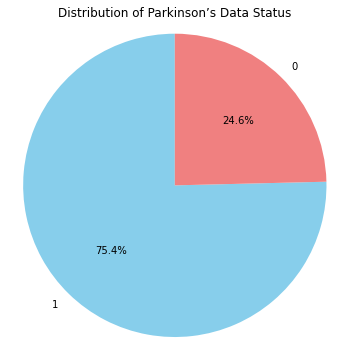

In [369]:

import matplotlib.pyplot as plt

# Count values in 'status' column
status_counts = df['status'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Parkinson’s Data Status')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle.
plt.show()


### Heatmap plotting

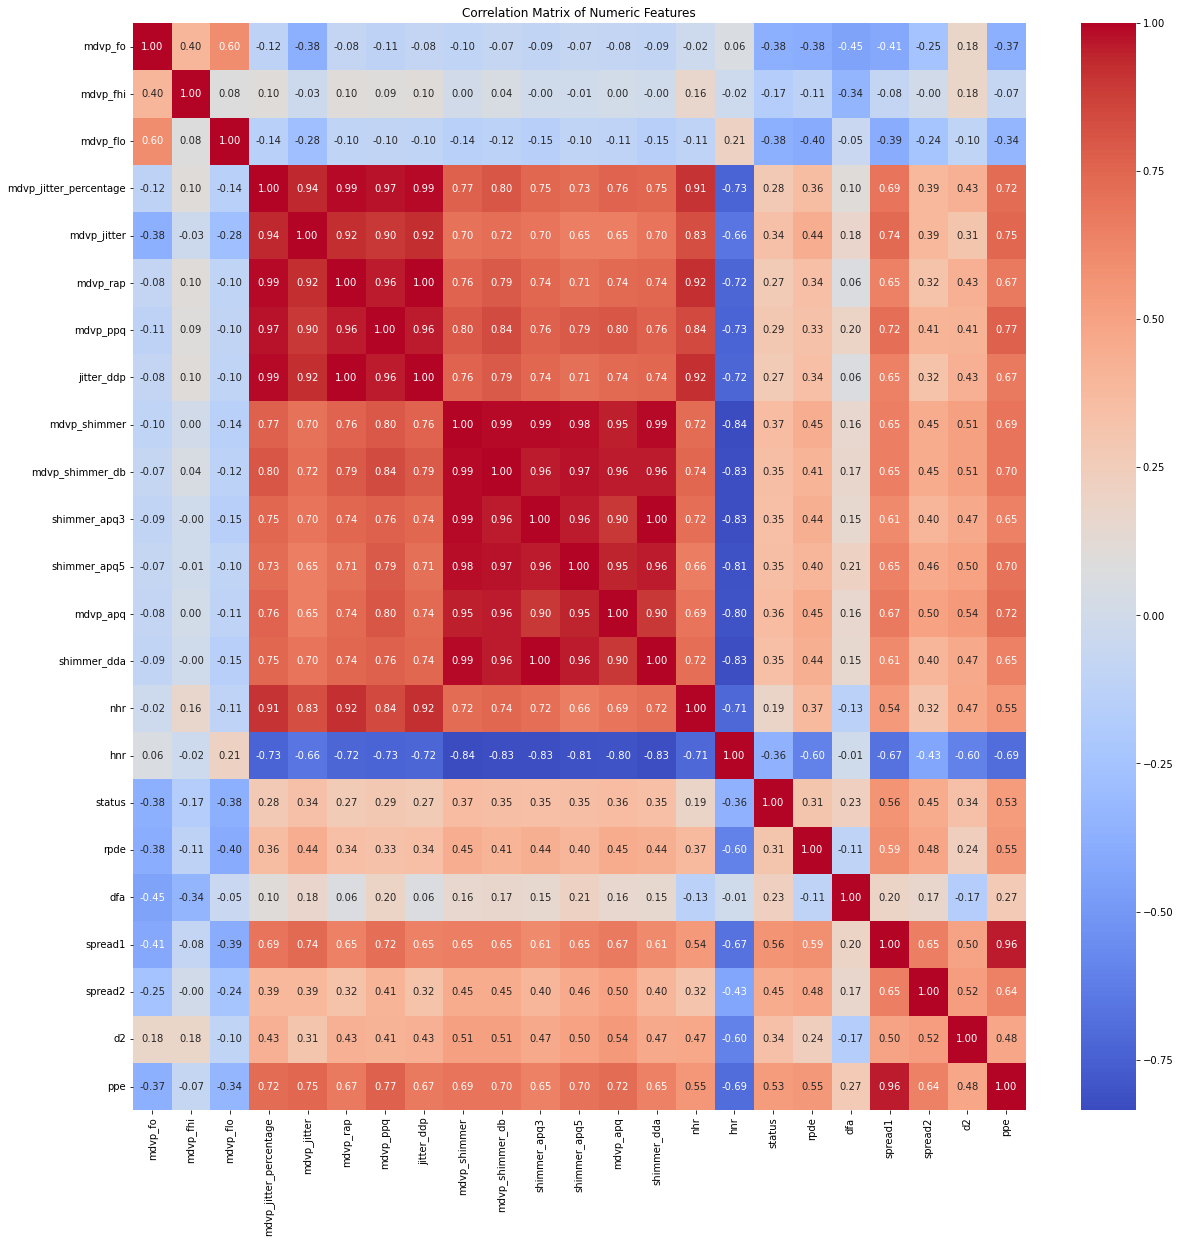

In [370]:
"""plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), fmt='.2f', annot=True);
"""

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Plot correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_df.corr(), fmt='.2f', annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()



## Univariate and Bivariate analysis

In [371]:
# A function that returns value counts for a column split by status
def groupby_get_cc_count(tdf, col):
    tdf = tdf.groupby([col, "status"])["status"].count().reset_index(level = 0)
    tdf.columns = [col, "count"]
    tdf = tdf.reset_index()
    return tdf

In [372]:
df[["mdvp_fo", "mdvp_jitter", "status"]]

mdvp_fo  mdvp_jitter  status
0    119.992      0.00007       1
1    122.400      0.00008       1
2    116.682      0.00009       1
3    116.676      0.00009       1
4    116.014      0.00011       1
..       ...          ...     ...
190  174.188      0.00003       0
191  209.516      0.00003       0
192  174.688      0.00008       0
193  198.764      0.00004       0
194  214.289      0.00003       0

[195 rows x 3 columns]

### Charts Plotting for Five Number Summary

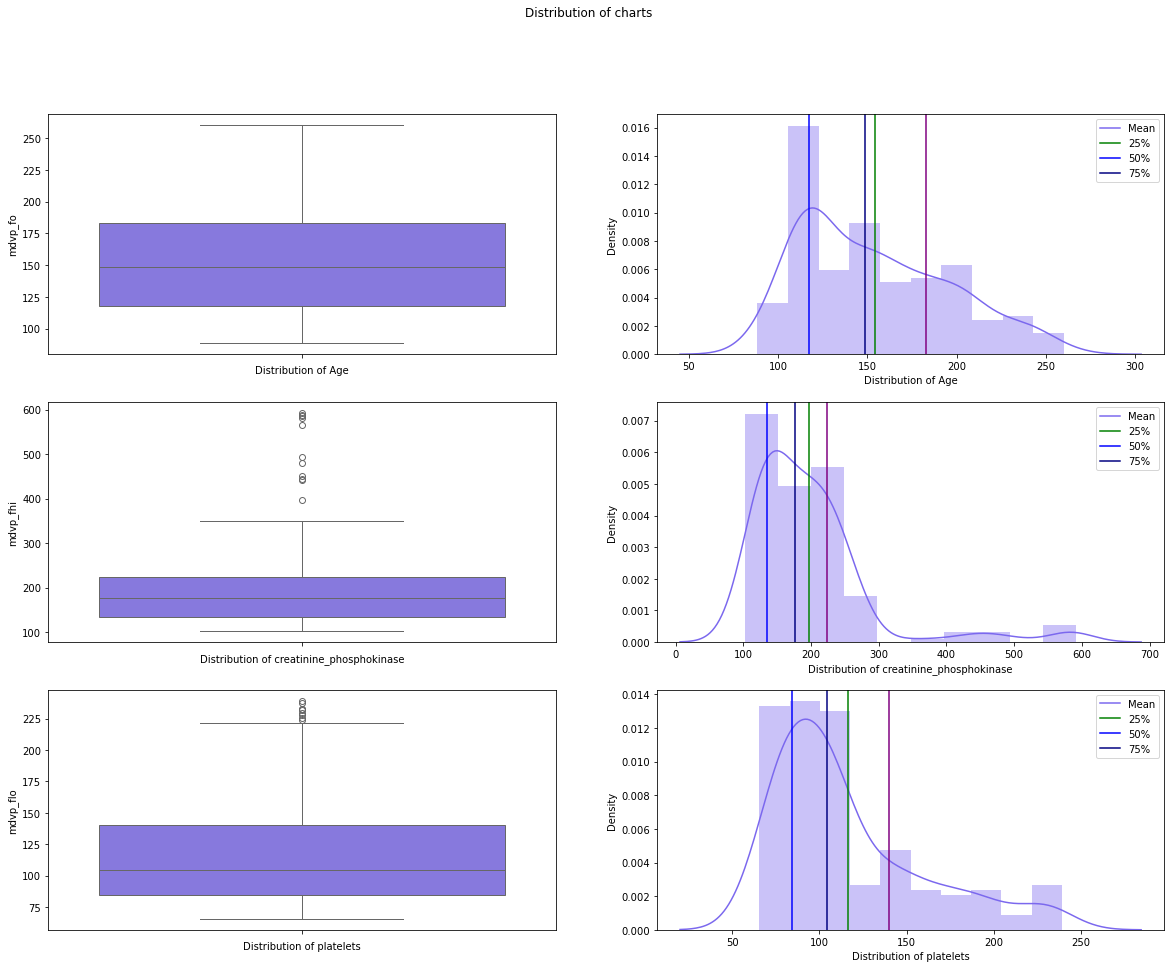

In [373]:
def draw_axvlines(plt, col):
    mean = df_summary.loc["mean", col]
    q1 = df_summary.loc["25%", col]
    q2 = df_summary.loc["50%", col]
    q3 = df_summary.loc["75%", col]
    plt.axvline(mean, color = "g");              # Plotting a line to mark the mean
    plt.axvline(q1, color = "b");                # Plotting a line to mark Q1
    plt.axvline(q2, color = "navy");             # Plotting a line to mark Q2
    plt.axvline(q3, color = "purple");           # Plotting a line to mark Q3
    plt.legend({"Mean": mean, "25%" : q1, "50%" : q2, "75%" : q3});

fig, axes = plt.subplots(3, 2, figsize = (20,15));
fig.suptitle('Distribution of charts');


# Create boxplot to show distribution of Age
sns.boxplot(df["mdvp_fo"], ax = axes[0][0], color = "mediumslateblue");
axes[0][0].set(xlabel = 'Distribution of Age');

pp = sns.distplot(df["mdvp_fo"], ax = axes[0][1], bins = 10, color = "mediumslateblue");
axes[0][1].set(xlabel = 'Distribution of Age');
draw_axvlines(pp, "mdvp_fo");


# Create boxplot to show distribution of creatinine_phosphokinase
sns.boxplot(df["mdvp_fhi"], ax = axes[1][0], color = "mediumslateblue");
axes[1][0].set(xlabel = 'Distribution of creatinine_phosphokinase');

pp = sns.distplot(df["mdvp_fhi"], ax = axes[1][1], bins = 10, color = "mediumslateblue");
axes[1][1].set(xlabel = 'Distribution of creatinine_phosphokinase');
draw_axvlines(pp, "mdvp_fhi")


# Create boxplot to show distribution of platelets
sns.boxplot(df["mdvp_flo"], ax = axes[2][0], color = "mediumslateblue");
axes[2][0].set(xlabel = 'Distribution of platelets');

pp = sns.distplot(df["mdvp_flo"], ax = axes[2][1], color = "mediumslateblue");
axes[2][1].set(xlabel = 'Distribution of platelets');
draw_axvlines(pp, "mdvp_flo")

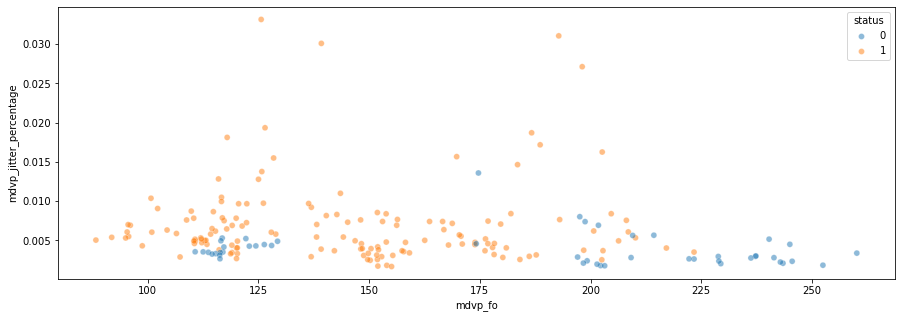

In [374]:
plt.figure(figsize = (15, 5))
sns.scatterplot(x = "mdvp_fo", y = "mdvp_jitter_percentage", data = df[["mdvp_fo", "mdvp_jitter_percentage", "status"]], hue = "status", alpha = 0.5);

From the above plot, we can see that the people without Parkinsons have their fundamental frequencies that is either high or very low and the percentage of jitter is usually lower that 0.005%.

In [375]:
df_train = df.copy().drop(columns=["name"])
col_names = df_train.columns.tolist()
target_col = ["status"]
col_names.remove(target_col[0])
df_train = df_train[col_names + target_col]

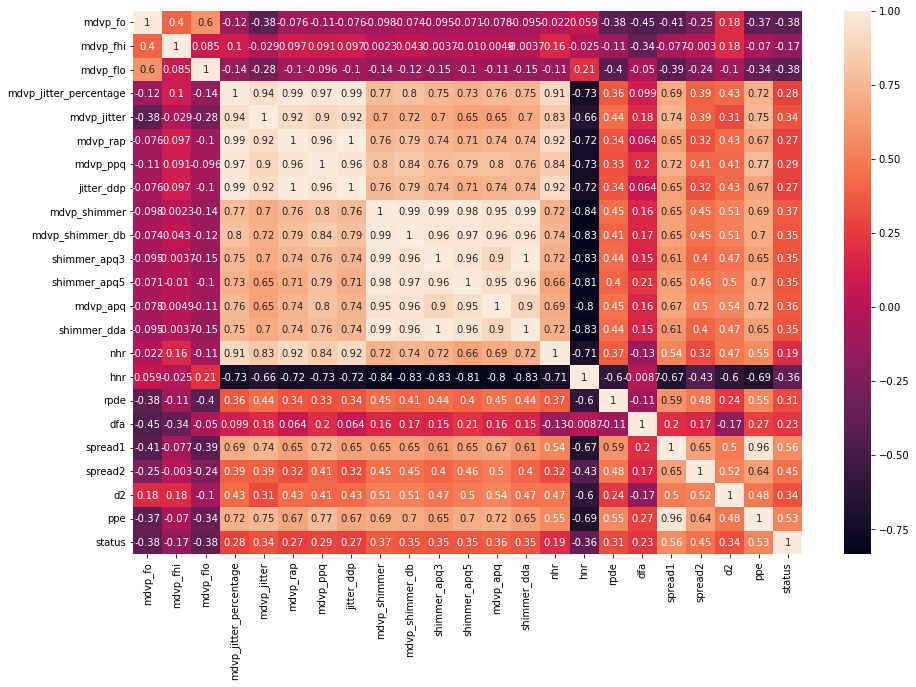

In [376]:
plt.figure(figsize=(15,10))
corr = df_train.corr()
sns.heatmap(corr, annot=True, fmt='.2g');

## Standardization (Scaling)

In [377]:
std = StandardScaler()

### Standardize the columns to get them on the same scale

In [378]:
scaled = std.fit_transform(df_train[col_names])
scaled = pd.DataFrame(scaled, columns=col_names)

df_train = pd.concat([scaled, df_train[target_col]], axis=1)

df_train.head()

mdvp_fo  mdvp_fhi  mdvp_flo  mdvp_jitter_percentage  mdvp_jitter  \
0 -0.829300 -0.436165 -0.952037                0.334914     0.749759   
1 -0.770972 -0.530974 -0.057721                0.715418     1.037674   
2 -0.909476 -0.723168 -0.109875                0.884991     1.325589   
3 -0.909622 -0.649092 -0.114229                0.775389     1.325589   
4 -0.925657 -0.606245 -0.130608                1.368893     1.901418   

   mdvp_rap  mdvp_ppq  jitter_ddp  mdvp_shimmer  mdvp_shimmer_db  ...  \
0  0.132963  0.760800    0.131755      0.745985         0.739536  ...   
1  0.453892  1.276809    0.452684      1.681731         1.768464  ...   
2  0.720770  1.585687    0.721813      1.202693         1.027636  ...   
3  0.578885  1.284076    0.577677      1.340396         1.207698  ...   
4  1.095750  2.047187    1.096793      1.836448         1.552389  ...   

   shimmer_dda       nhr       hnr      rpde       dfa   spread1   spread2  \
0     0.607532 -0.067893 -0.193225 -0.807838  1.760814  0.801323  0.480477   
1     1.548254 -0.137843 -0.634508 -0.387524  1.837562  1.479853  1.311185   
2     1.175323 -0.291633 -0.279760 -0.662075  1.942048  1.141445  1.017682   
3     1.340229 -0.280719 -0.281346 -0.613134  1.832380  1.440945  1.293840   
4     1.899461 -0.178026 -0.506745 -0.783021  1.909364  1.780940  0.096195   

         d2       ppe  status  
0 -0.210531  0.868886       1  
1  0.275077  1.803605       1  
2 -0.103629  1.402661       1  
3  0.062145  1.806954       1  
4 -0.130026  2.267082       1  

[5 rows x 23 columns]

In [379]:
len(df_train[col_names].columns)

22

## Train and Test Split  80 : 20 ratio

In [380]:
X = df_train[col_names]      # Contains the independent columns
#y = df_train[target_col]     # Our target column
y = df_train[target_col[0]] # Our target column

# Class imbalance 

In [381]:
df['status'].value_counts()


1    147
0     48
Name: status, dtype: int64

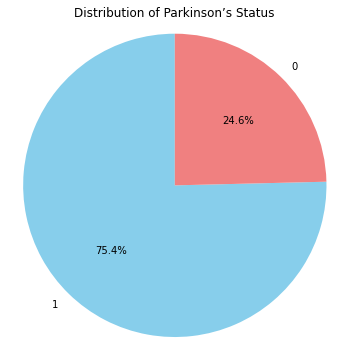

In [382]:
import matplotlib.pyplot as plt

# Count values in 'status' column
status_counts = df['status'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Parkinson’s Status')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle.
plt.show()


In [383]:
#pip install --upgrade scikit-learn imbalanced-learn


In [384]:
import sklearn
import imblearn

print("scikit-learn version:", sklearn.__version__)
print("imbalanced-learn version:", imblearn.__version__)


scikit-learn version: 1.6.1
imbalanced-learn version: 0.12.4


# SMOTE for Class Imbalance Dataset

In [385]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

print("Resampled class distribution:")
print(pd.Series(y).value_counts()) 


Resampled class distribution:
1    147
0    147
Name: status, dtype: int64


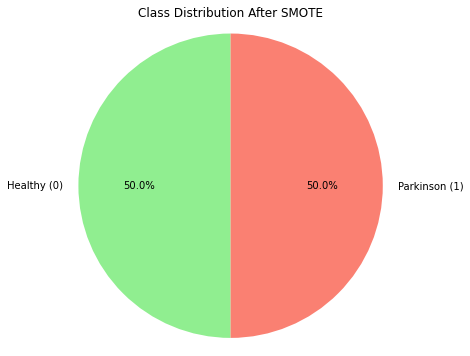

In [386]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming y is now the resampled label array from SMOTE
resampled_counts = pd.Series(y).value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(resampled_counts, 
        labels=['Healthy (0)', 'Parkinson (1)'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['lightgreen', 'salmon'])

plt.title("Class Distribution After SMOTE")
plt.axis('equal')
plt.show()


# Train Test Split

In [387]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# The lines below are not needed as y_train and y_test are already Series
# y_train = y_train["status"]
# y_test = y_test["status"]

# Models Training

In [388]:
conf_matrix_all = {}

def parkinsons_disease_pred(name, algo, training_x, testing_x, training_y, testing_y, plot):
    algo.fit(training_x, training_y)

    # Predictions and Probabilities
    train_preds = algo.predict(training_x)
    predictions = algo.predict(testing_x)
    probabilities = algo.predict_proba(testing_x)

    # Confusion Matrix
    conf_matrix = confusion_matrix(testing_y, predictions)
    conf_matrix_all[name] = conf_matrix

    # Classification Report
    print(f"\n=== {name} ===")
    print("Classification report (Test data):")
    print(classification_report(testing_y, predictions))

    # Metrics
    train_acc = accuracy_score(training_y, train_preds)
    test_acc = accuracy_score(testing_y, predictions)
    train_rmse = math.sqrt(mean_squared_error(training_y, train_preds))
    test_rmse = math.sqrt(mean_squared_error(testing_y, predictions))
    auc = roc_auc_score(testing_y, probabilities[:, 1])

    print(f"Train Accuracy: {train_acc * 100:.2f}%")
    print(f"Test Accuracy: {test_acc * 100:.2f}%")
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Area under the curve: {auc:.3f}")

    # ROC Curve Data
    fpr, tpr, thresholds = roc_curve(testing_y, probabilities[:, 1])

    if plot:
        fig, axes = plt.subplots(1, 2, figsize=(20, 7))

        # Confusion Matrix Plot
        conf_matrix_flipped = np.flip(conf_matrix)
        labels = np.array([['\nTP', '\nFN'], ['\nFP', '\nTN']])
        labels = np.core.defchararray.add(conf_matrix_flipped.astype(str), labels)
        sns.heatmap(conf_matrix_flipped, fmt='', annot=labels, ax=axes[0], cmap="YlGnBu", xticklabels=[1, 0], yticklabels=[1, 0])
        axes[0].set(xlabel='Predicted', ylabel='Actual')

        # ROC Curve Plot - FIXED
        axes[1].plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})', color='blue', lw=2)
        axes[1].plot([0, 1], [0, 1], linestyle='--', color='orange', label='Random')
        axes[1].set_xlim([0.0, 1.0])
        axes[1].set_ylim([0.0, 1.05])
        axes[1].set_xlabel('False Positive Rate')
        axes[1].set_ylabel('True Positive Rate')
        axes[1].set_title('Receiver Operating Characteristic')
        axes[1].legend(loc='lower right')

        plt.show()


### 1. Logistic Regression


=== Logistic Regression ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       0.85      0.77      0.81        30
           1       0.78      0.86      0.82        29

    accuracy                           0.81        59
   macro avg       0.82      0.81      0.81        59
weighted avg       0.82      0.81      0.81        59

Train Accuracy: 78.30%
Test Accuracy: 81.36%
Train RMSE: 0.4659
Test RMSE: 0.4318
Area under the curve: 0.947


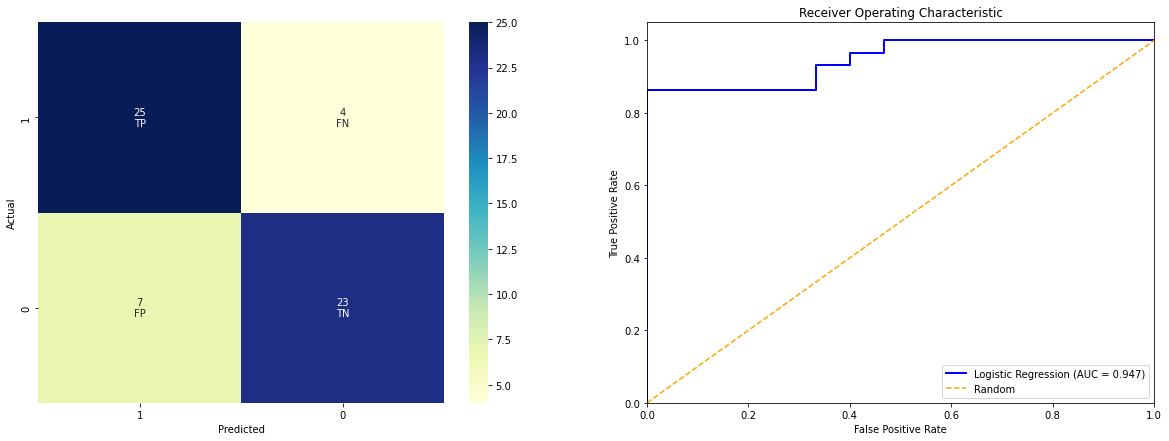

In [389]:
lr  = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, penalty="l1", solver='liblinear')

parkinsons_disease_pred("Logistic Regression", lr, x_train, x_test, y_train, y_test, plot = True)

### 2. K-nearest Neighbors


=== K-Nearest Neighbours ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        29

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

Train Accuracy: 97.45%
Test Accuracy: 100.00%
Train RMSE: 0.1598
Test RMSE: 0.0000
Area under the curve: 1.000


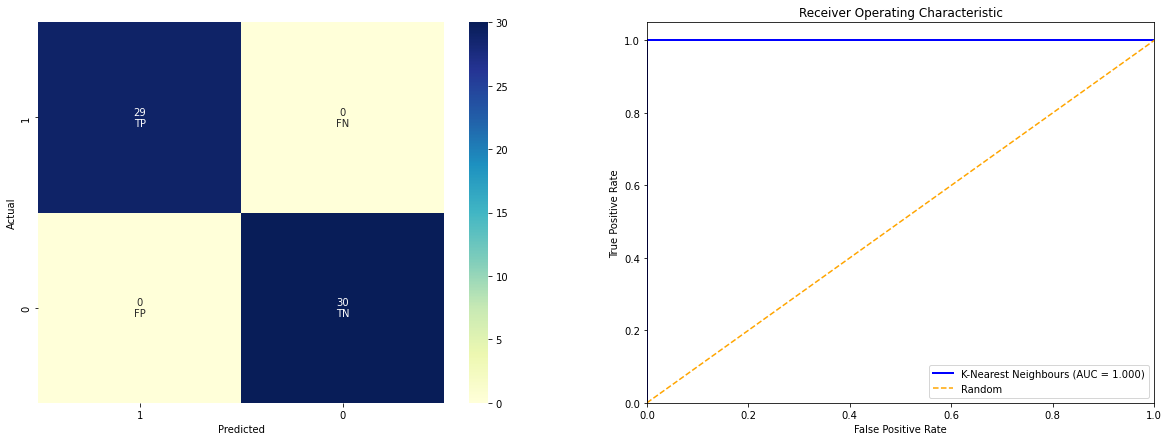

In [390]:
knn = KNeighborsClassifier( metric='manhattan',  n_neighbors = 3)

parkinsons_disease_pred("K-Nearest Neighbours", knn, x_train, x_test, y_train, y_test, plot=True)

### 3. Naive Bayes


=== Gaussian Naïve Bayes ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        30
           1       1.00      0.72      0.84        29

    accuracy                           0.86        59
   macro avg       0.89      0.86      0.86        59
weighted avg       0.89      0.86      0.86        59

Train Accuracy: 77.02%
Test Accuracy: 86.44%
Train RMSE: 0.4794
Test RMSE: 0.3682
Area under the curve: 0.968


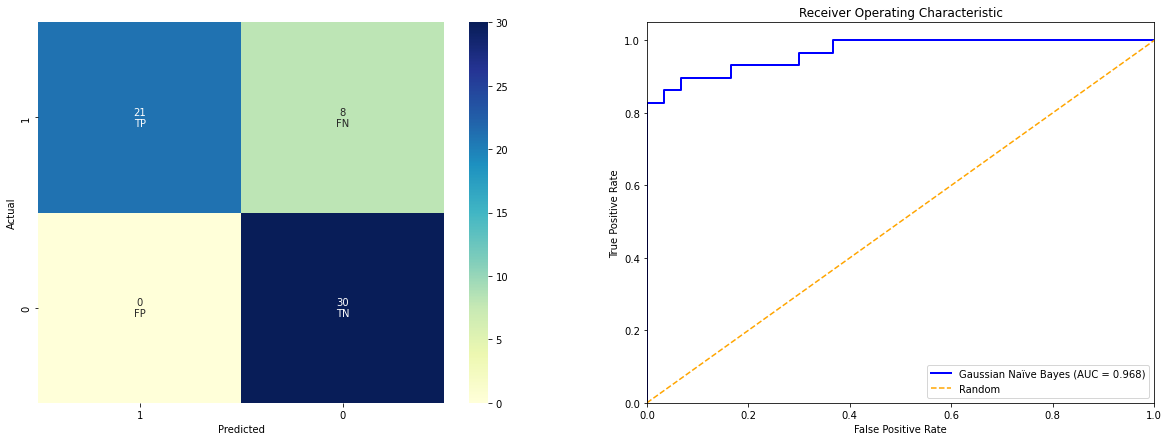

In [391]:
gnb = GaussianNB(priors=None, var_smoothing=1e-09)

parkinsons_disease_pred("Gaussian Naïve Bayes", gnb, x_train, x_test, y_train, y_test, plot=True)

### 4. Support Vector Classifier


=== Support Vector Classifier ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        30
           1       0.96      0.86      0.91        29

    accuracy                           0.92        59
   macro avg       0.92      0.91      0.91        59
weighted avg       0.92      0.92      0.91        59

Train Accuracy: 89.79%
Test Accuracy: 91.53%
Train RMSE: 0.3196
Test RMSE: 0.2911
Area under the curve: 0.956


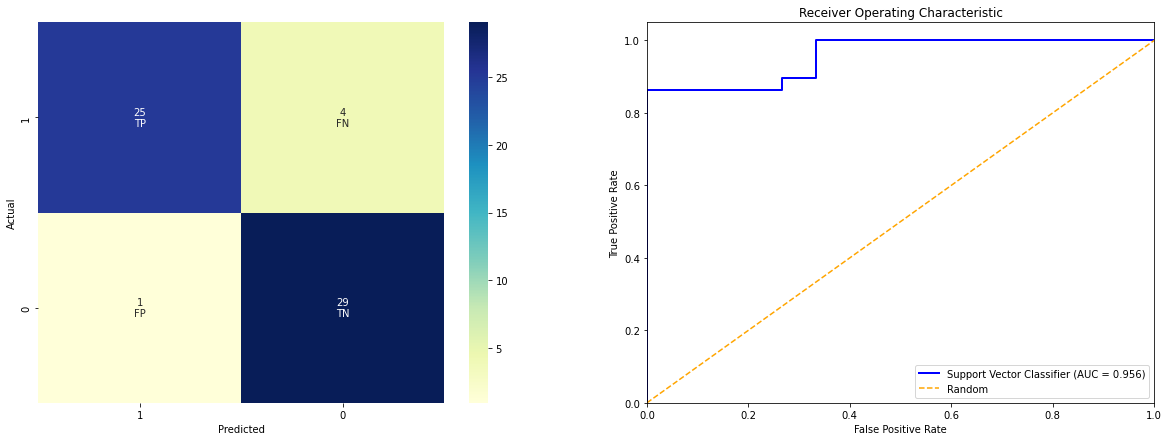

In [392]:
svc = SVC(C=1.0, kernel='linear', degree= 2, gamma=1.0, random_state=None,
          coef0=0.0, shrinking=True, probability=True,tol=0.001,
          cache_size=200, class_weight=None, verbose=False,max_iter= -1)


parkinsons_disease_pred("Support Vector Classifier", svc, x_train, x_test, y_train, y_test, plot=True)

# 5. Decision Tree


=== Decision Tree ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        30
           1       0.93      0.97      0.95        29

    accuracy                           0.95        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.95      0.95      0.95        59

Train Accuracy: 100.00%
Test Accuracy: 94.92%
Train RMSE: 0.0000
Test RMSE: 0.2255
Area under the curve: 0.949


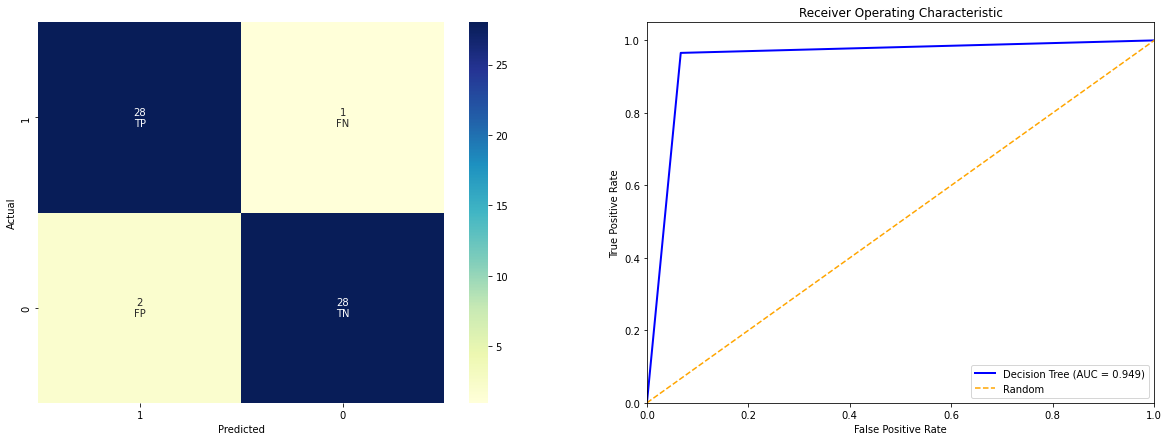

In [393]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier with common parameters
"""dtc = DecisionTreeClassifier(criterion='gini',        # or 'entropy'
                             max_depth=None,          # or set to a value like 5
                             min_samples_split=2,
                             min_samples_leaf=1,
                             random_state=0) """



dtc = DecisionTreeClassifier()


# Run the prediction and evaluation
parkinsons_disease_pred("Decision Tree", dtc, x_train, x_test, y_train, y_test, plot=True)


## Ensemble models

### 6. Random Forest


=== Random Forest ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        29

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

Train Accuracy: 100.00%
Test Accuracy: 100.00%
Train RMSE: 0.0000
Test RMSE: 0.0000
Area under the curve: 1.000


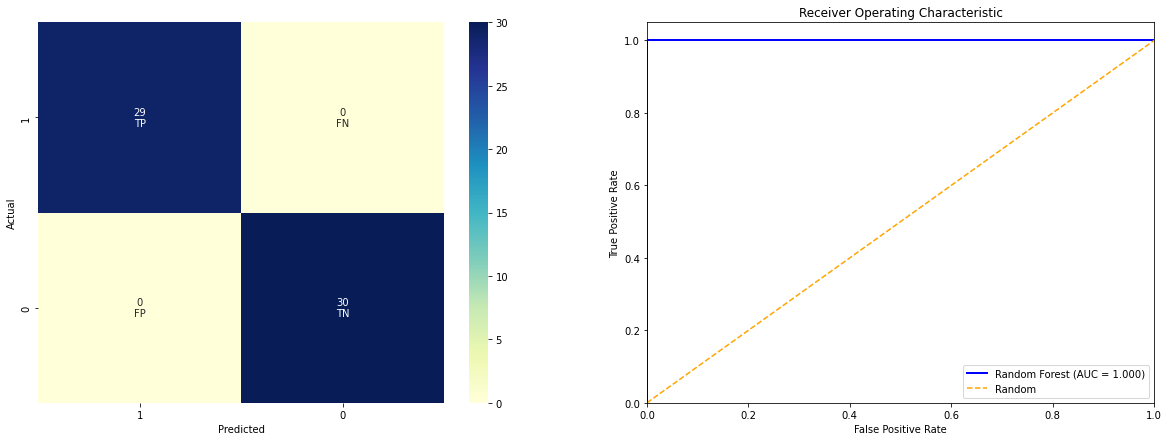

In [406]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier with max_features='sqrt'
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, criterion="gini",
                             min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                             max_features='sqrt',  # Changed 'auto' to 'sqrt'
                             max_leaf_nodes=None, min_impurity_decrease=0.0,
                             bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0,
                             warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)


parkinsons_disease_pred("Random Forest", rfc,x_train, x_test, y_train, y_test, plot=True)


## 7. Bagging Classifier


=== Bagging Classifier ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        29

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

Train Accuracy: 99.57%
Test Accuracy: 100.00%
Train RMSE: 0.0652
Test RMSE: 0.0000
Area under the curve: 1.000


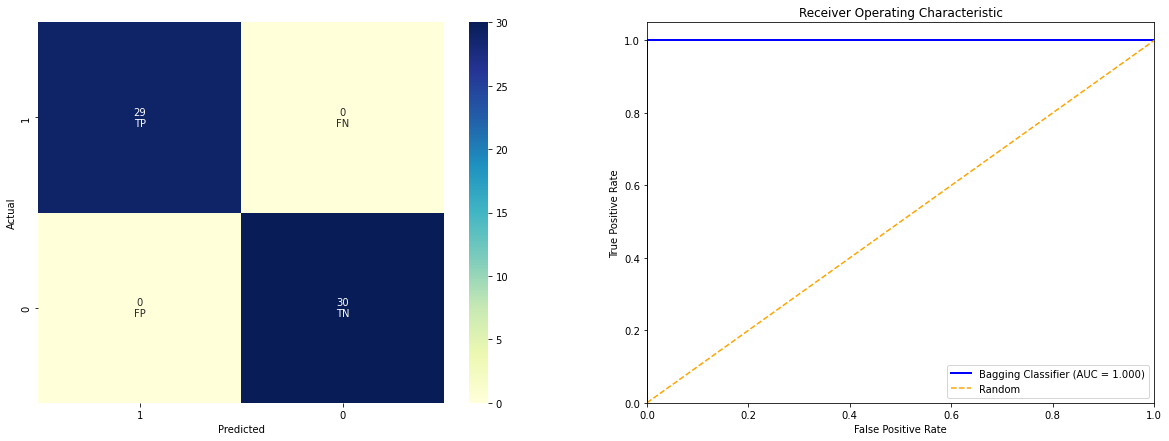

In [395]:
from sklearn.ensemble import BaggingClassifier

bcc = BaggingClassifier()

parkinsons_disease_pred("Bagging Classifier", bcc,x_train, x_test, y_train, y_test, plot=True)

## 8. AdaBoost


=== AdaBoost ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        30
           1       0.89      0.86      0.88        29

    accuracy                           0.88        59
   macro avg       0.88      0.88      0.88        59
weighted avg       0.88      0.88      0.88        59

Train Accuracy: 84.26%
Test Accuracy: 88.14%
Train RMSE: 0.3968
Test RMSE: 0.3444
Area under the curve: 0.955


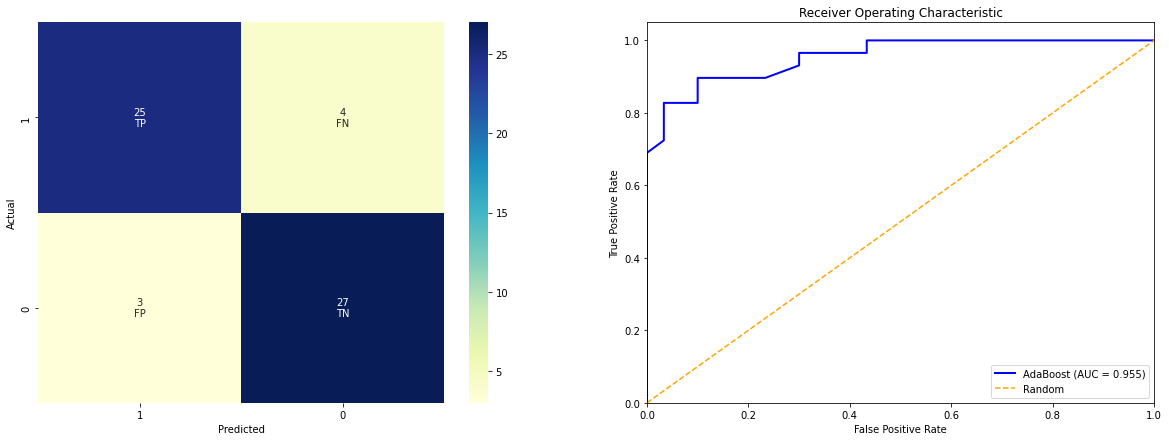

In [396]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoostClassifier using 'estimator' instead of 'base_estimator'
# Changed algorithm from 'SAMME.R' to 'SAMME' as per error message
abc = AdaBoostClassifier(estimator=None, learning_rate=0.06, algorithm='SAMME')

parkinsons_disease_pred("AdaBoost", abc,x_train, x_test, y_train, y_test, plot=True)




## 9. Gradient Boosting


=== Gradient Boosting ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.97      1.00      0.98        29

    accuracy                           0.98        59
   macro avg       0.98      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59

Train Accuracy: 100.00%
Test Accuracy: 98.31%
Train RMSE: 0.0000
Test RMSE: 0.1302
Area under the curve: 1.000


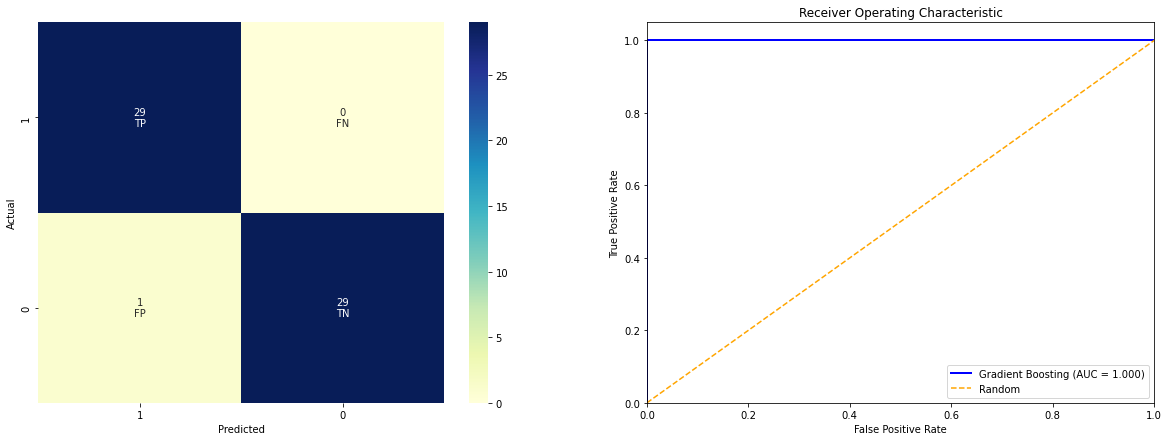

In [397]:
from sklearn.ensemble import GradientBoostingClassifier


gbc = GradientBoostingClassifier(random_state=42)


parkinsons_disease_pred("Gradient Boosting", gbc, x_train, x_test, y_train, y_test, plot=True)




# Stack and Train Meta-Classifier

Accuracy: 0.82 (+/- 0.03) [StackingClassifier]

=== Stacking Classifier ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        30
           1       0.96      0.86      0.91        29

    accuracy                           0.92        59
   macro avg       0.92      0.91      0.91        59
weighted avg       0.92      0.92      0.91        59

Train Accuracy: 90.21%
Test Accuracy: 91.53%
Train RMSE: 0.3128
Test RMSE: 0.2911
Area under the curve: 0.964


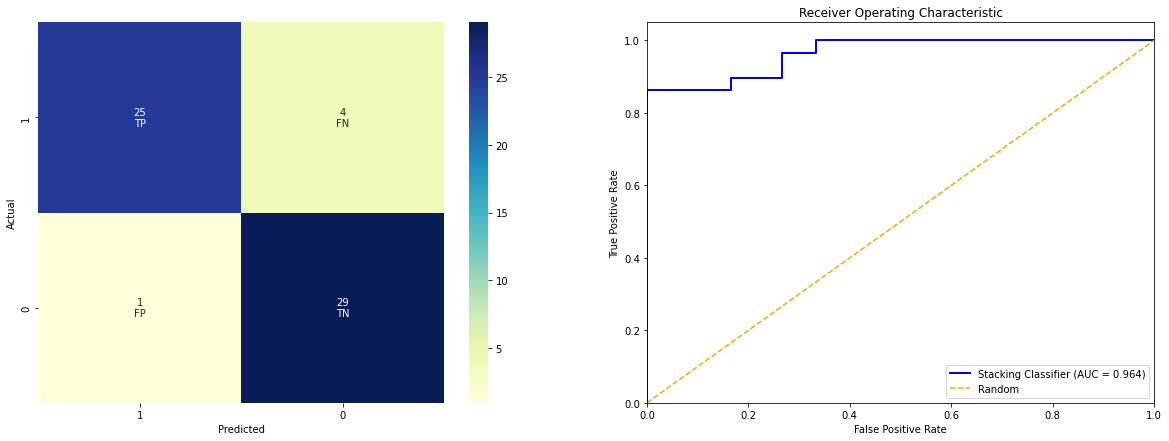

In [448]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score # Import cross_val_score

stack_clf = StackingClassifier(
    estimators=[('Naive Bayes', gnb), ('svc', svc),('LR',lr)],
    final_estimator=lr,
    cv=5,
    passthrough=False
)

# Evaluate with cross_val_score
scores = cross_val_score(stack_clf, X, y, cv = 5, scoring='accuracy')
print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f}) [StackingClassifier]")

# Or run your evaluation function
stack_clf.fit(x_train, y_train)
parkinsons_disease_pred("Stacking Classifier", stack_clf, x_train, x_test, y_train, y_test, plot=True)

## All Above Confusion Matrix side by side comparison

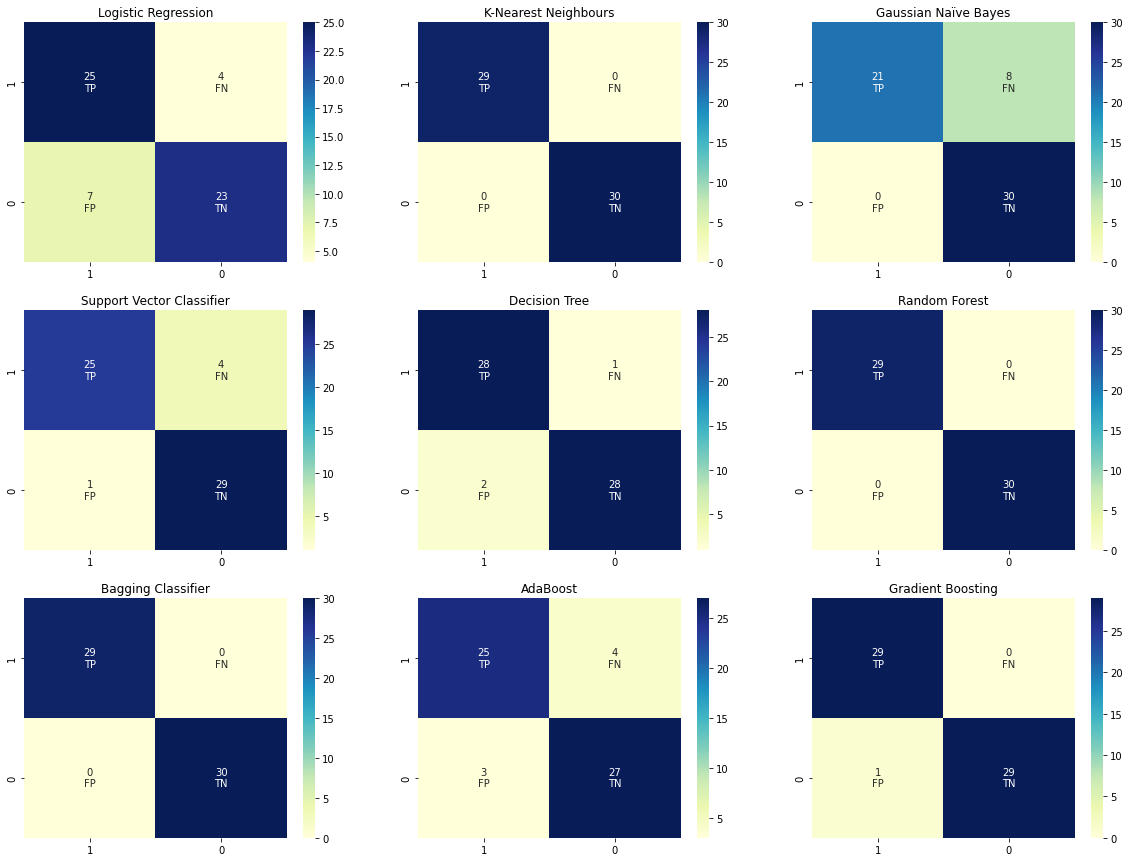

In [398]:
import math
fig, axes = plt.subplots(3,3, figsize = (20, 15))

cnt = 0
for r in range(4):
    for c in range(4):
        try:
            conf_matrix = np.flip(list(conf_matrix_all.values())[cnt])
            labels = np.array([['\nTP','\nFN'],['\nFP','\nTN']])
            labels = np.core.defchararray.add(conf_matrix.astype(str), labels)

            sns.heatmap(conf_matrix, fmt='', annot = labels, ax=axes[r, c], cmap="YlGnBu", xticklabels=[1, 0], yticklabels=[1, 0]);
            axes[r, c].set(title=list(conf_matrix_all.keys())[cnt])
            cnt += 1
        except:
            pass

# Root Mean Square Error ( RMSE )


In [399]:
from sklearn.metrics import mean_squared_error
import math



In [400]:
def parkinsons_disease_pred(name, algo, training_x, testing_x, training_y, testing_y):
    algo.fit(training_x, training_y)

    # Predictions and Probabilities
    train_preds = algo.predict(training_x)
    test_preds = algo.predict(testing_x)

    # Ensure binary classification and extract positive class probability
    try:
        test_probs = algo.predict_proba(testing_x)[:, 1]
    except AttributeError:
        print(f"{name} does not support predict_proba.")
        return

    # Evaluation
    print(f"\n=== {name} ===")
    print("Classification Report:")
    print(classification_report(testing_y, test_preds))

    train_acc = accuracy_score(training_y, train_preds)
    test_acc = accuracy_score(testing_y, test_preds)
    train_rmse = math.sqrt(mean_squared_error(training_y, train_preds))
    test_rmse = math.sqrt(mean_squared_error(testing_y, test_preds))
    auc = roc_auc_score(testing_y, test_probs)

    print(f"Train Accuracy: {train_acc * 100:.2f}%")
    print(f"Test Accuracy: {test_acc * 100:.2f}%")
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Area Under the Curve (AUC): {auc:.3f}")

    # Store for ROC curve plotting
    fpr, tpr, _ = roc_curve(testing_y, test_probs)
    roc_data[name] = (fpr, tpr)
    auc_scores[name] = auc


In [401]:
def plot_combined_roc():
    plt.figure(figsize=(10, 7))
    for clf_name, (fpr, tpr) in roc_data.items():
        auc = auc_scores[clf_name]
        plt.plot(fpr, tpr, label=f"{clf_name}, AUC={auc:.3f}")

    plt.plot([0, 1], [0, 1], '--', color='orange', linewidth=2, label='Random Classifier')
    plt.title("ROC Curve Analysis", fontsize=16)
    plt.xlabel("False Positive Rate", fontsize=12)
    plt.ylabel("True Positive Rate", fontsize=12)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()



=== DecisionTree ===
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        30
           1       0.93      0.93      0.93        29

    accuracy                           0.93        59
   macro avg       0.93      0.93      0.93        59
weighted avg       0.93      0.93      0.93        59

Train Accuracy: 100.00%
Test Accuracy: 93.22%
Train RMSE: 0.0000
Test RMSE: 0.2604
Area Under the Curve (AUC): 0.932

=== KNN ===
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        29

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

Train Accuracy: 97.45%
Test Accuracy: 100.00%
Train RMSE: 0.1598
Test RMSE: 0.0000
Area Under the Curve (AUC): 1.000

=== RandomForest ===
Classific

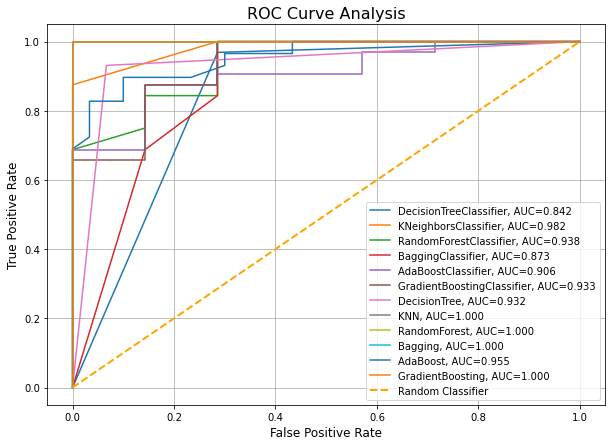

In [402]:
models = {
    "DecisionTree": DecisionTreeClassifier(),
     "KNN": KNeighborsClassifier( metric='manhattan',  n_neighbors = 3),
    
     "RandomForest": RandomForestClassifier(n_estimators=100, max_depth=5, criterion="gini",
                             min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                             max_features='sqrt',  # Changed 'auto' to 'sqrt'
                             max_leaf_nodes=None, min_impurity_decrease=0.0,
                             bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0,
                             warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None),

    "Bagging": BaggingClassifier(),
    "AdaBoost": AdaBoostClassifier(estimator=None, learning_rate=0.06, algorithm='SAMME'),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)

}

for name, model in models.items():
    parkinsons_disease_pred(name, model, x_train, x_test, y_train, y_test)

plot_combined_roc()


# Model Evaluation


### Accuracy Score

In [449]:
# Accuracy Score on training data
X_train_pred = rfc.predict(x_train)
training_data_accuracy = accuracy_score(y_train, X_train_pred)
rmse_train = math.sqrt(mean_squared_error(y_train, X_train_pred))

In [450]:
print(f'Accuracy (Training Data) : {training_data_accuracy * 100:.2f}%')
print(f'RMSE (Training Data) : {rmse_train * 100:.2f}%')

Accuracy (Training Data) : 100.00%
RMSE (Training Data) : 0.00%


In [451]:
# Accuracy Score on test data
X_test_pred = rfc.predict(x_test)
testing_data_accuracy = accuracy_score(y_test, X_test_pred)
rmse_test = math.sqrt(mean_squared_error(y_test, X_test_pred))


In [452]:
print(f'Accuracy (Testing Data) : {testing_data_accuracy * 100:.2f}%')
print(f'RMSE (Testing Data) : {rmse_test * 100:.2f}%')

Accuracy (Testing Data) : 100.00%
RMSE (Testing Data) : 0.00%


## Predictive System

In [454]:
#from sklearn.preprocessing import StandardScaler
#import numpy as np


# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to your training data
scaler.fit(x_train)

# Now you can transform your input data using the fitted scaler
input_data =(0.63239631, -0.02731081, -0.87985049,  0.36806203,  0.14406765,         0.49280653,  0.30476869,  0.49170115, -0.3137565 , -0.32592164,        -0.25848708, -0.23791175, -0.33873289, -0.25879402, -0.2113724 ,        -0.61257363,  0.87112118,  0.24786644,  0.19888239, -0.97586547,        -0.55160318,  0.07769494         )
input_data_numpy = np.asarray(input_data)

# Reshape the numpy array
input_data_reshape = input_data_numpy.reshape(1, -1)

# Standardize the input data using the fitted scaler
std_data = scaler.transform(input_data_reshape)

# Now you can use the standardized data for prediction
# prediction
prediction = rfc.predict(std_data)
print(prediction)

if (prediction[0] == 1):
  print('This person has Parkinson disease')
elif (prediction[0] == 0):
  print('This person does not have Parkinson disease')
else:
  print('Some error in processing please provide sufficient and relevant data ')


[1]
This person has Parkinson disease


## Extracting the ML Model


### Using Pickle

In [455]:
import pickle

# Save the model to a file
with open('RF_pickle_model.pkl', 'wb') as file:
    pickle.dump(knn, file)

# Load the model from the file
with open('RF_pickle_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [456]:
x_train.shape

(235, 22)

In [457]:
y_train.shape

(235,)

In [458]:
x_test.shape

(59, 22)

In [459]:
y_test.shape

(59,)

# Feature Selection Techniques

In [260]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score


# Chi2 Feature Selection

In [265]:

# Step a: Chi2 feature selection (k=11)
chi2_selector = SelectKBest(chi2, k=11)
X_train_chi2 = chi2_selector.fit_transform(abs(x_train), y_train)  # chi2 requires non-negative data
X_test_chi2 = chi2_selector.transform(abs(x_test))
selected_features_mask = chi2_selector.get_support()
selected_features_chi2 = x_train.columns[selected_features_mask]

# Get scores for all features
chi2_scores = chi2_selector.scores_

# Filter scores of selected features
selected_scores = chi2_scores[selected_features_mask]

# Create DataFrame to display feature names and scores
selected_features_scores_df = pd.DataFrame({
    'Feature': selected_features_chi2,
    'Chi2 Score': selected_scores
}).sort_values(by='Chi2 Score', ascending=False)

print("\n\n\t\tSelected features by Chi2 with their scores:\n")
print(selected_features_scores_df.to_string(index=False))




		Selected features by Chi2 with their scores:

        Feature  Chi2 Score
    shimmer_dda   14.816125
   shimmer_apq3   14.815421
   shimmer_apq5   14.099798
   mdvp_shimmer   13.955103
mdvp_shimmer_db   12.651289
        mdvp_fo   12.292720
       mdvp_apq   11.127699
       mdvp_flo    8.962322
       mdvp_rap    6.384448
     jitter_ddp    6.375340
       mdvp_ppq    6.368661


# Training on Chi2

In [266]:
conf_matrix_all = {}

def parkinsons_disease_pred(name, algo, training_x, testing_x, training_y, testing_y, plot):
    algo.fit(training_x, training_y)

    # Predictions and Probabilities
    train_preds = algo.predict(training_x)
    predictions = algo.predict(testing_x)
    probabilities = algo.predict_proba(testing_x)

    # Confusion Matrix
    conf_matrix = confusion_matrix(testing_y, predictions)
    conf_matrix_all[name] = conf_matrix

    # Classification Report
    print(f"\n=== {name} ===")
    print("Classification report (Test data):")
    print(classification_report(testing_y, predictions))

    # Metrics
    train_acc = accuracy_score(training_y, train_preds)
    test_acc = accuracy_score(testing_y, predictions)
    train_rmse = math.sqrt(mean_squared_error(training_y, train_preds))
    test_rmse = math.sqrt(mean_squared_error(testing_y, predictions))
    auc = roc_auc_score(testing_y, probabilities[:, 1])

    print(f"Train Accuracy: {train_acc * 100:.2f}%")
    print(f"Test Accuracy: {test_acc * 100:.2f}%")
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Area under the curve: {auc:.3f}")

    # ROC Curve Data
    fpr, tpr, thresholds = roc_curve(testing_y, probabilities[:, 1])

    if plot:
        fig, axes = plt.subplots(1, 2, figsize=(20, 7))

        # Confusion Matrix Plot
        conf_matrix_flipped = np.flip(conf_matrix)
        labels = np.array([['\nTP', '\nFN'], ['\nFP', '\nTN']])
        labels = np.core.defchararray.add(conf_matrix_flipped.astype(str), labels)
        sns.heatmap(conf_matrix_flipped, fmt='', annot=labels, ax=axes[0], cmap="YlGnBu", xticklabels=[1, 0], yticklabels=[1, 0])
        axes[0].set(xlabel='Predicted', ylabel='Actual')

        # ROC Curve Plot - FIXED
        axes[1].plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})', color='blue', lw=2)
        axes[1].plot([0, 1], [0, 1], linestyle='--', color='orange', label='Random')
        axes[1].set_xlim([0.0, 1.0])
        axes[1].set_ylim([0.0, 1.05])
        axes[1].set_xlabel('False Positive Rate')
        axes[1].set_ylabel('True Positive Rate')
        axes[1].set_title('Receiver Operating Characteristic')
        axes[1].legend(loc='lower right')

        plt.show()


# Random forest


=== Random Forest ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        29

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

Train Accuracy: 100.00%
Test Accuracy: 100.00%
Train RMSE: 0.0000
Test RMSE: 0.0000
Area under the curve: 1.000


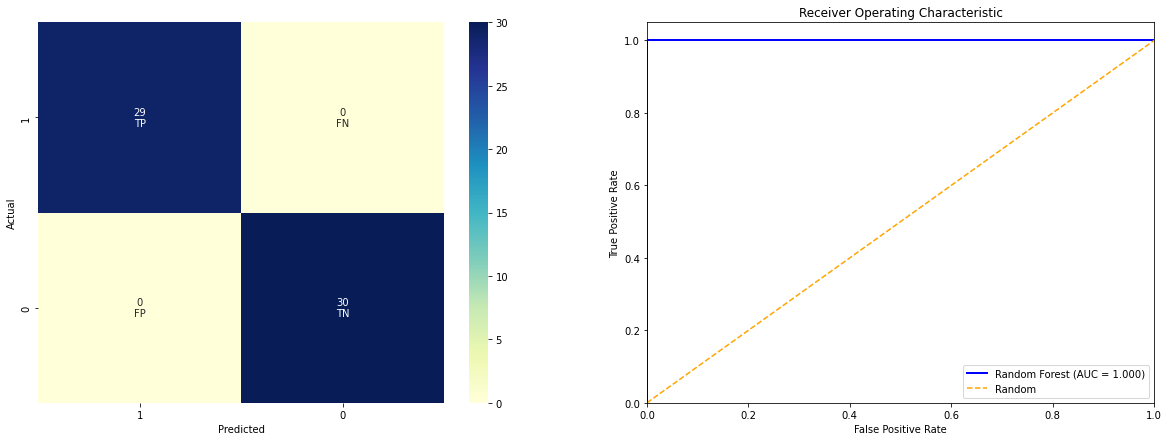

In [267]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier with max_features='sqrt'
"""rfc = RandomForestClassifier(n_estimators=100, max_depth=5, criterion="gini",
                             min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                             max_features='sqrt',  # Changed 'auto' to 'sqrt'
                             max_leaf_nodes=None, min_impurity_decrease=0.0,
                             bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0,
                             warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)"""


rfc = RandomForestClassifier()


parkinsons_disease_pred("Random Forest", rfc,x_train, x_test, y_train, y_test, plot=True)


# Decision Tree


=== Decision Tree ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       0.74      0.93      0.82        30
           1       0.90      0.66      0.76        29

    accuracy                           0.80        59
   macro avg       0.82      0.79      0.79        59
weighted avg       0.82      0.80      0.79        59

Train Accuracy: 100.00%
Test Accuracy: 79.66%
Train RMSE: 0.0000
Test RMSE: 0.4510
Area under the curve: 0.794


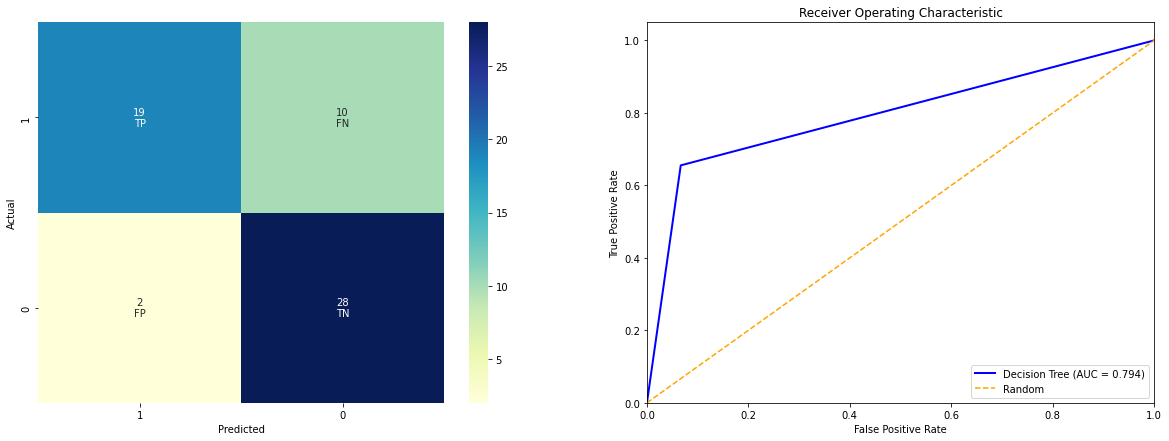

In [413]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier with common parameters
"""dtc = DecisionTreeClassifier(criterion='gini',        # or 'entropy'
                             max_depth=None,          # or set to a value like 5
                             min_samples_split=2,
                             min_samples_leaf=1,
                             random_state=0) """



dtc = DecisionTreeClassifier()


# Run the prediction and evaluation
parkinsons_disease_pred("Decision Tree", dtc, X_train_chi2, X_test_chi2, y_train, y_test, plot=True)


# KNN


=== K-Nearest Neighbours ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        30
           1       0.88      0.76      0.81        29

    accuracy                           0.83        59
   macro avg       0.84      0.83      0.83        59
weighted avg       0.84      0.83      0.83        59

Train Accuracy: 93.62%
Test Accuracy: 83.05%
Train RMSE: 0.2526
Test RMSE: 0.4117
Area under the curve: 0.945


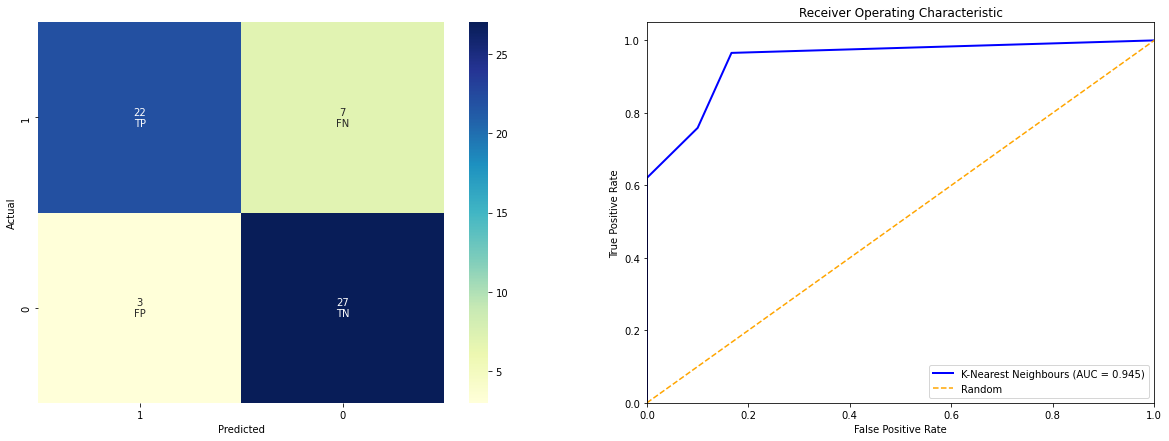

In [414]:
knn = KNeighborsClassifier( metric='manhattan',  n_neighbors = 3)

parkinsons_disease_pred("K-Nearest Neighbours", knn, X_train_chi2, X_test_chi2, y_train, y_test, plot=True)

# Bagging 


=== Bagging Classifier ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       0.70      0.93      0.80        30
           1       0.89      0.59      0.71        29

    accuracy                           0.76        59
   macro avg       0.80      0.76      0.75        59
weighted avg       0.80      0.76      0.75        59

Train Accuracy: 98.72%
Test Accuracy: 76.27%
Train RMSE: 0.1130
Test RMSE: 0.4871
Area under the curve: 0.911


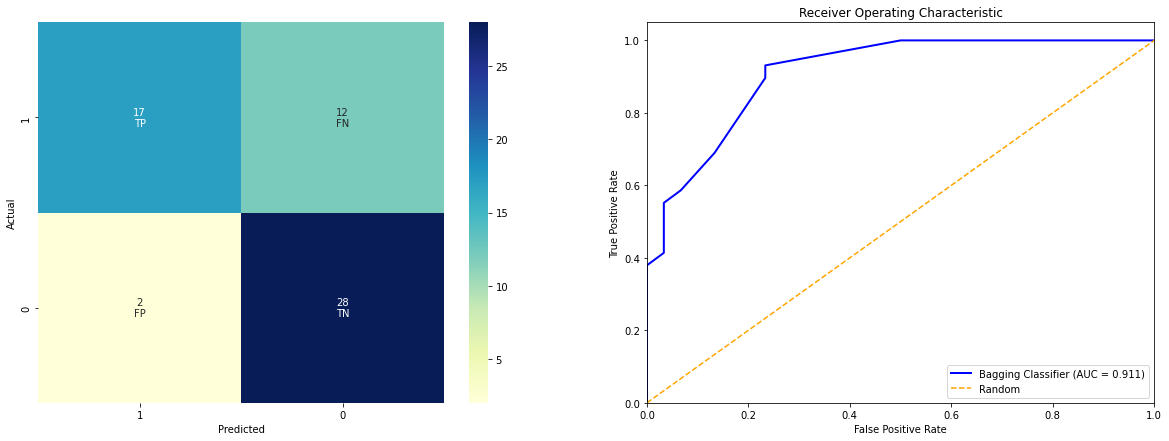

In [408]:
from sklearn.ensemble import BaggingClassifier

bcc = BaggingClassifier()

parkinsons_disease_pred("Bagging Classifier", bcc,X_train_chi2, X_test_chi2, y_train, y_test, plot=True)

# AdaBoosting


=== AdaBoost ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       0.69      0.97      0.81        30
           1       0.94      0.55      0.70        29

    accuracy                           0.76        59
   macro avg       0.82      0.76      0.75        59
weighted avg       0.81      0.76      0.75        59

Train Accuracy: 81.28%
Test Accuracy: 76.27%
Train RMSE: 0.4327
Test RMSE: 0.4871
Area under the curve: 0.870


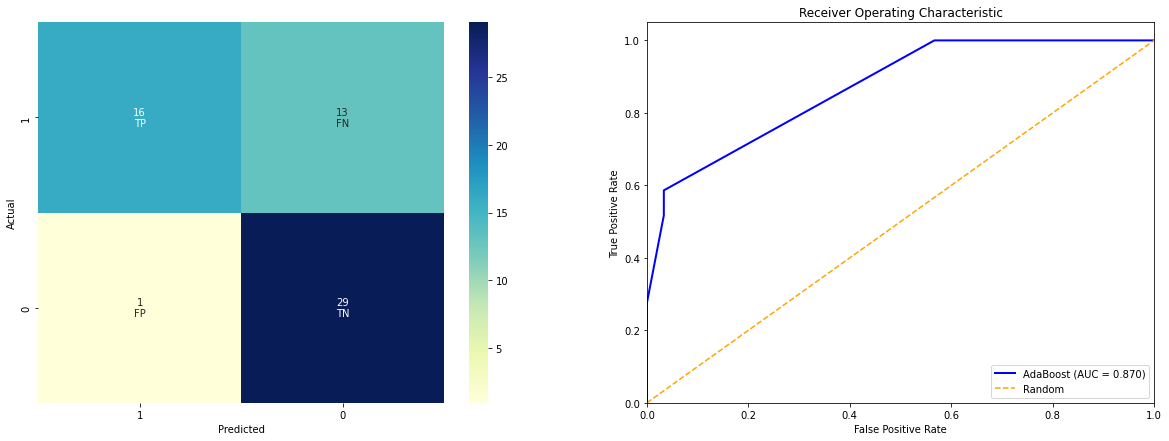

In [410]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoostClassifier using 'estimator' instead of 'base_estimator'
# Changed algorithm from 'SAMME.R' to 'SAMME' as per error message
abc = AdaBoostClassifier(estimator=None, learning_rate=0.06, algorithm='SAMME')

parkinsons_disease_pred("AdaBoost", abc,X_train_chi2, X_test_chi2, y_train, y_test, plot=True)




# Gradient Boosting


=== Gradient Boosting ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        30
           1       0.96      0.86      0.91        29

    accuracy                           0.92        59
   macro avg       0.92      0.91      0.91        59
weighted avg       0.92      0.92      0.91        59

Train Accuracy: 100.00%
Test Accuracy: 91.53%
Train RMSE: 0.0000
Test RMSE: 0.2911
Area under the curve: 0.969


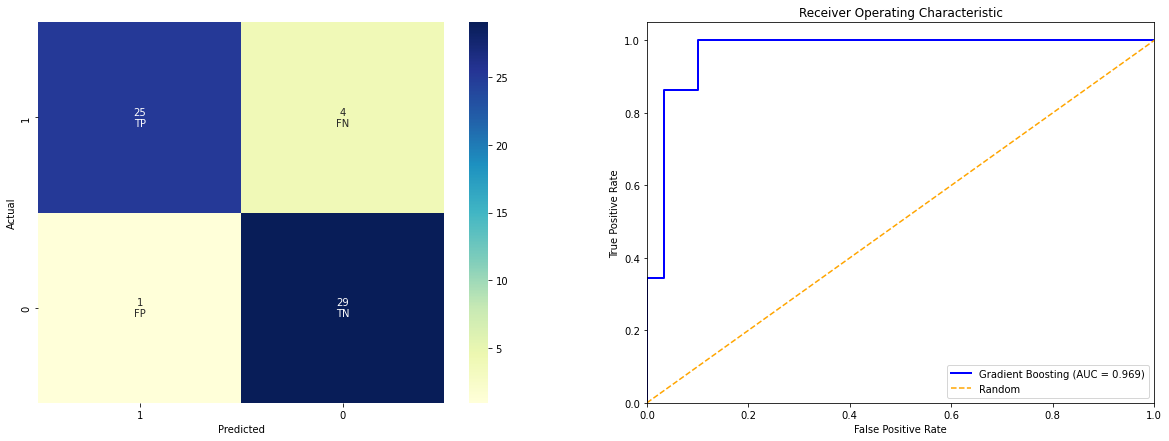

In [415]:
from sklearn.ensemble import GradientBoostingClassifier


gbc = GradientBoostingClassifier(random_state=42)


parkinsons_disease_pred("Gradient Boosting", gbc, X_train_chi2, X_test_chi2,y_train, y_test, plot=True)




# Logestic Regression


=== Logistic Regression ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       0.65      0.87      0.74        30
           1       0.79      0.52      0.62        29

    accuracy                           0.69        59
   macro avg       0.72      0.69      0.68        59
weighted avg       0.72      0.69      0.68        59

Train Accuracy: 70.64%
Test Accuracy: 69.49%
Train RMSE: 0.5419
Test RMSE: 0.5523
Area under the curve: 0.753


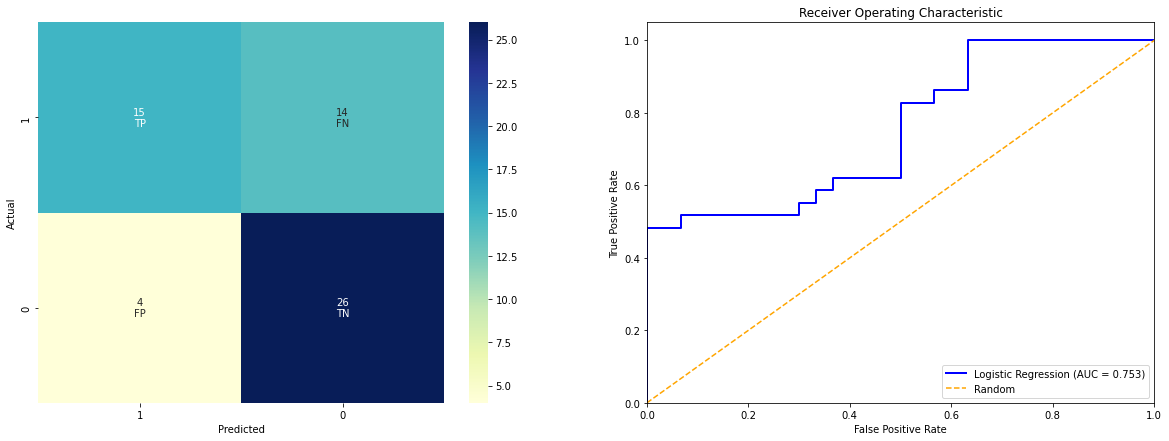

In [418]:
lr  = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, penalty="l1", solver='liblinear')

parkinsons_disease_pred("Logistic Regression", lr, X_train_chi2, X_test_chi2, y_train, y_test, plot = True)

# Naive Bayes


=== Gaussian Naïve Bayes ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        30
           1       1.00      0.31      0.47        29

    accuracy                           0.66        59
   macro avg       0.80      0.66      0.61        59
weighted avg       0.80      0.66      0.61        59

Train Accuracy: 64.26%
Test Accuracy: 66.10%
Train RMSE: 0.5979
Test RMSE: 0.5822
Area under the curve: 0.863


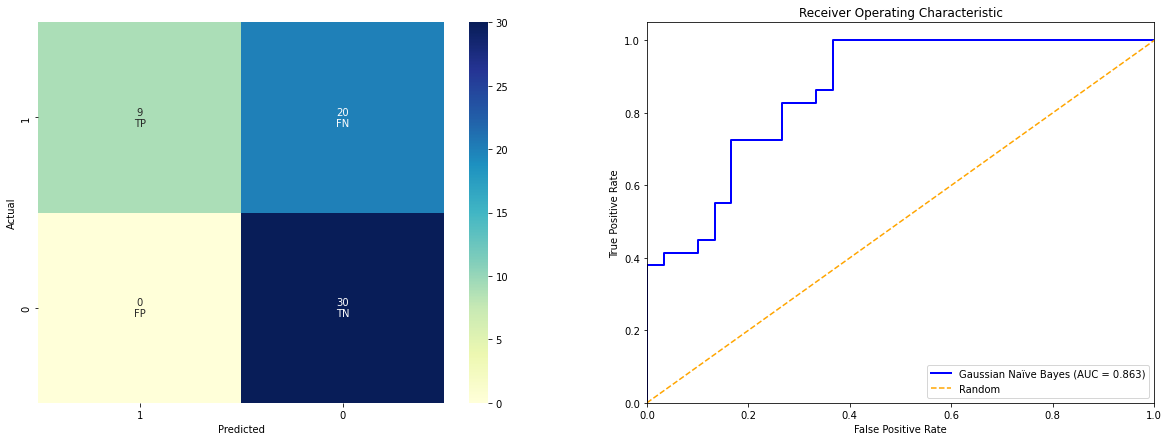

In [421]:
gnb = GaussianNB(priors=None, var_smoothing=1e-09)

parkinsons_disease_pred("Gaussian Naïve Bayes", gnb, X_train_chi2, X_test_chi2, y_train, y_test, plot=True)

# SVM


=== Support Vector Classifier ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       0.64      0.90      0.75        30
           1       0.82      0.48      0.61        29

    accuracy                           0.69        59
   macro avg       0.73      0.69      0.68        59
weighted avg       0.73      0.69      0.68        59

Train Accuracy: 76.60%
Test Accuracy: 69.49%
Train RMSE: 0.4838
Test RMSE: 0.5523
Area under the curve: 0.766


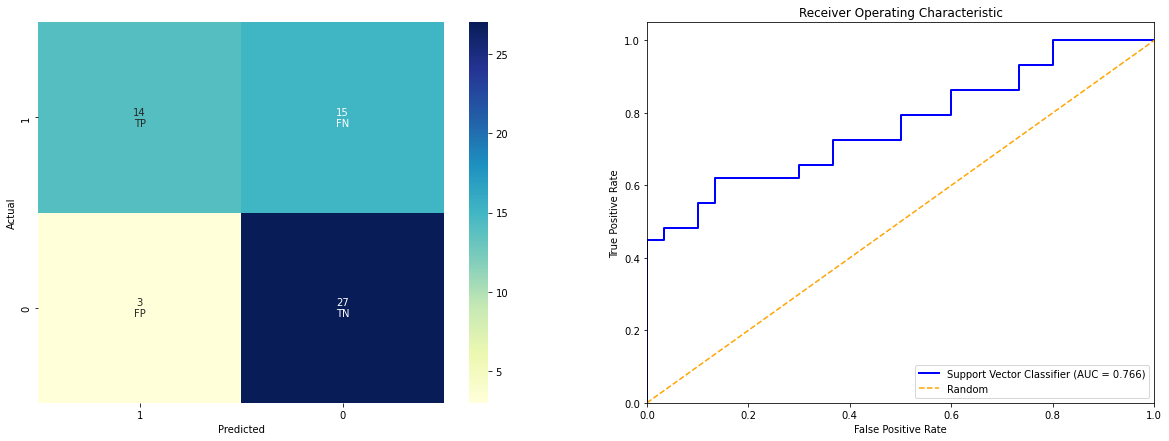

In [424]:
svc = SVC(C=1.0, kernel='linear', degree= 2, gamma=1.0, random_state=None,
          coef0=0.0, shrinking=True, probability=True,tol=0.001,
          cache_size=200, class_weight=None, verbose=False,max_iter= -1)


parkinsons_disease_pred("Support Vector Classifier", svc,  X_train_chi2, X_test_chi2, y_train, y_test, plot=True)

# Extra Trees Classifier feature selection 

In [277]:
from sklearn.ensemble import ExtraTreesClassifier


# Fit Extra Trees Classifier
etc = ExtraTreesClassifier(random_state=42)
etc.fit(x_train, y_train)

# Get feature importances for all features
importances = etc.feature_importances_

# Get indices of top 11 features by importance
indices_etc = np.argsort(importances)[::-1][:11]

# Get names of selected features
selected_features_etc = x_train.columns[indices_etc]

# Select importances of those features
selected_importances = importances[indices_etc]

# Create DataFrame of feature names and their importances
selected_features_importances_df = pd.DataFrame({
    'Feature': selected_features_etc,
    'Importance': selected_importances
}).sort_values(by='Importance', ascending=False)

print("\n\n\t\tSelected features by Extra Trees Classifier with their importances:\n")
print(selected_features_importances_df.to_string(index=False))

# Optional: create training/testing datasets with selected features
X_train_etc = x_train[selected_features_etc]
X_test_etc = x_test[selected_features_etc]




		Selected features by Extra Trees Classifier with their importances:

     Feature  Importance
     spread1    0.100652
     mdvp_fo    0.091100
         ppe    0.075586
    mdvp_flo    0.062663
          d2    0.055325
     spread2    0.054524
         dfa    0.044115
 mdvp_jitter    0.043644
    mdvp_apq    0.042671
shimmer_apq3    0.042649
    mdvp_fhi    0.039234


# Training on Extra Trees Classifier

In [278]:
conf_matrix_all = {}

def parkinsons_disease_pred(name, algo, training_x, testing_x, training_y, testing_y, plot):
    algo.fit(training_x, training_y)

    # Predictions and Probabilities
    train_preds = algo.predict(training_x)
    predictions = algo.predict(testing_x)
    probabilities = algo.predict_proba(testing_x)

    # Confusion Matrix
    conf_matrix = confusion_matrix(testing_y, predictions)
    conf_matrix_all[name] = conf_matrix

    # Classification Report
    print(f"\n=== {name} ===")
    print("Classification report (Test data):")
    print(classification_report(testing_y, predictions))

    # Metrics
    train_acc = accuracy_score(training_y, train_preds)
    test_acc = accuracy_score(testing_y, predictions)
    train_rmse = math.sqrt(mean_squared_error(training_y, train_preds))
    test_rmse = math.sqrt(mean_squared_error(testing_y, predictions))
    auc = roc_auc_score(testing_y, probabilities[:, 1])

    print(f"Train Accuracy: {train_acc * 100:.2f}%")
    print(f"Test Accuracy: {test_acc * 100:.2f}%")
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Area under the curve: {auc:.3f}")

    # ROC Curve Data
    fpr, tpr, thresholds = roc_curve(testing_y, probabilities[:, 1])

    if plot:
        fig, axes = plt.subplots(1, 2, figsize=(20, 7))

        # Confusion Matrix Plot
        conf_matrix_flipped = np.flip(conf_matrix)
        labels = np.array([['\nTP', '\nFN'], ['\nFP', '\nTN']])
        labels = np.core.defchararray.add(conf_matrix_flipped.astype(str), labels)
        sns.heatmap(conf_matrix_flipped, fmt='', annot=labels, ax=axes[0], cmap="YlGnBu", xticklabels=[1, 0], yticklabels=[1, 0])
        axes[0].set(xlabel='Predicted', ylabel='Actual')

        # ROC Curve Plot - FIXED
        axes[1].plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})', color='blue', lw=2)
        axes[1].plot([0, 1], [0, 1], linestyle='--', color='orange', label='Random')
        axes[1].set_xlim([0.0, 1.0])
        axes[1].set_ylim([0.0, 1.05])
        axes[1].set_xlabel('False Positive Rate')
        axes[1].set_ylabel('True Positive Rate')
        axes[1].set_title('Receiver Operating Characteristic')
        axes[1].legend(loc='lower right')

        plt.show()


# Random Forest


=== Random Forest ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        29

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

Train Accuracy: 100.00%
Test Accuracy: 100.00%
Train RMSE: 0.0000
Test RMSE: 0.0000
Area under the curve: 1.000


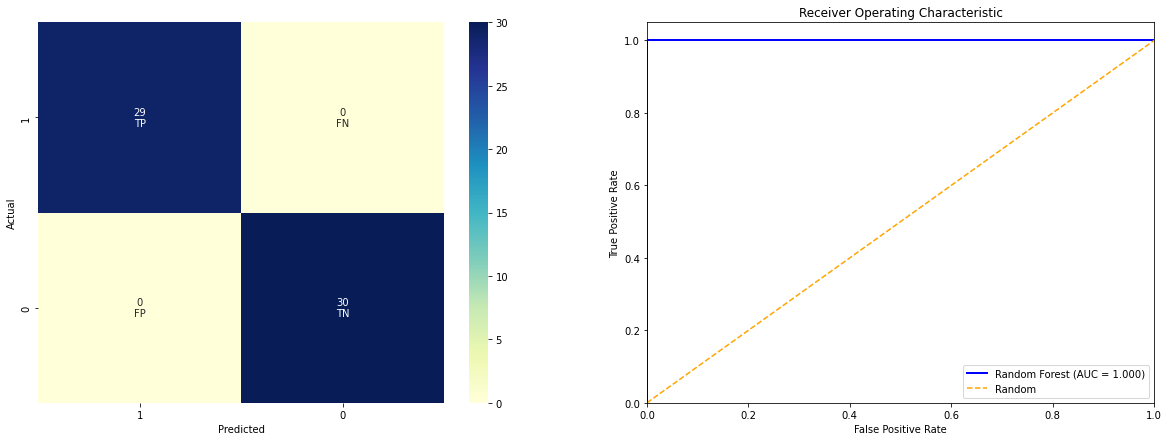

In [280]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier with max_features='sqrt'
"""rfc = RandomForestClassifier(n_estimators=100, max_depth=5, criterion="gini",
                             min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                             max_features='sqrt',  # Changed 'auto' to 'sqrt'
                             max_leaf_nodes=None, min_impurity_decrease=0.0,
                             bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0,
                             warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)"""


rfc = RandomForestClassifier()


parkinsons_disease_pred("Random Forest", rfc, X_train_etc, X_test_etc,  y_train, y_test, plot=True)


# Decision Tree


=== Decision Tree ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.97      0.98        29

    accuracy                           0.98        59
   macro avg       0.98      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59

Train Accuracy: 100.00%
Test Accuracy: 98.31%
Train RMSE: 0.0000
Test RMSE: 0.1302
Area under the curve: 0.983


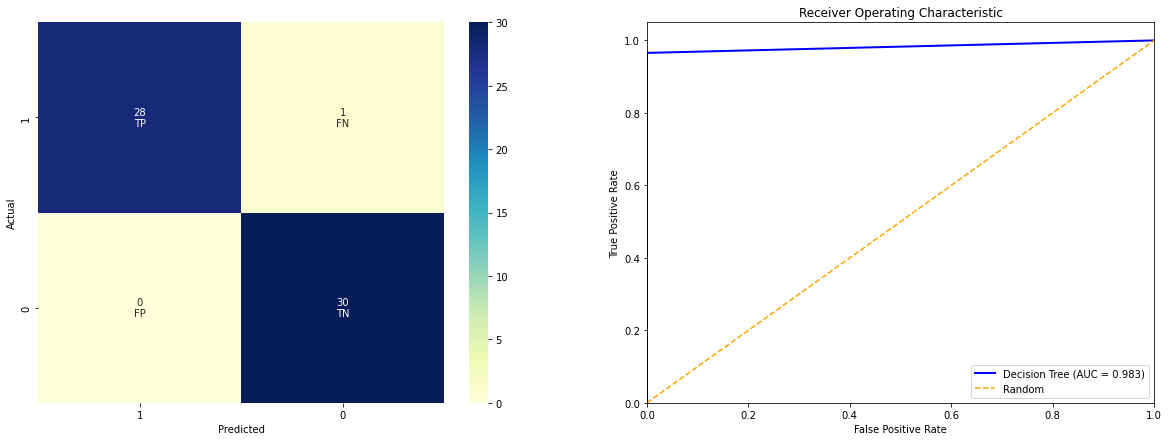

In [283]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier with common parameters
dtc = DecisionTreeClassifier(criterion='gini',        # or 'entropy'
                             max_depth=None,          # or set to a value like 5
                             min_samples_split=2,
                             min_samples_leaf=1,
                             random_state=0) 



#dtc = DecisionTreeClassifier()


# Run the prediction and evaluation
parkinsons_disease_pred("Decision Tree", dtc, X_train_etc, X_test_etc, y_train, y_test, plot=True)


# KNN 


=== K-Nearest Neighbours ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        29

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

Train Accuracy: 97.02%
Test Accuracy: 100.00%
Train RMSE: 0.1726
Test RMSE: 0.0000
Area under the curve: 1.000


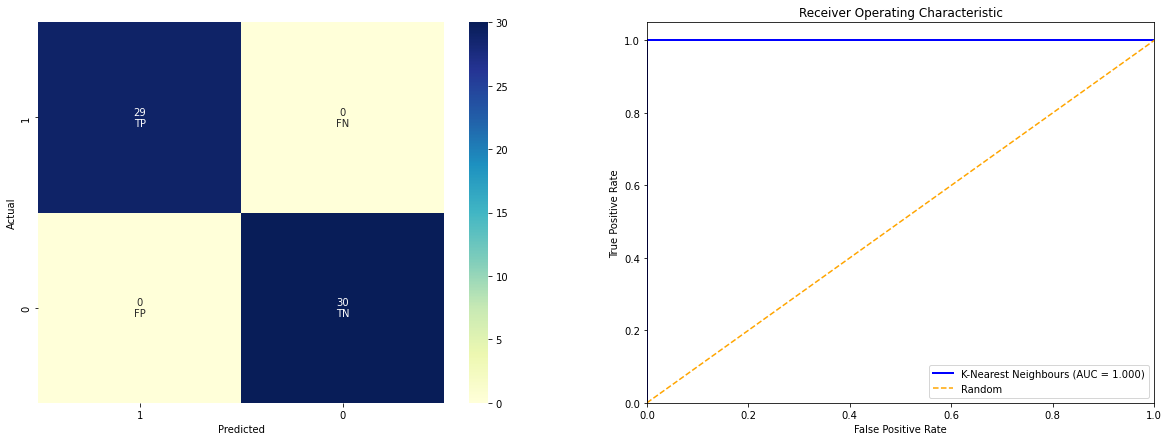

In [294]:
#knn = KNeighborsClassifier( metric='manhattan',  n_neighbors = 3)
knn = KNeighborsClassifier(n_neighbors = 3)


parkinsons_disease_pred("K-Nearest Neighbours", knn, X_train_etc, X_test_etc, y_train, y_test, plot=True)

# Bagging


=== Bagging Classifier ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        29

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

Train Accuracy: 99.57%
Test Accuracy: 100.00%
Train RMSE: 0.0652
Test RMSE: 0.0000
Area under the curve: 1.000


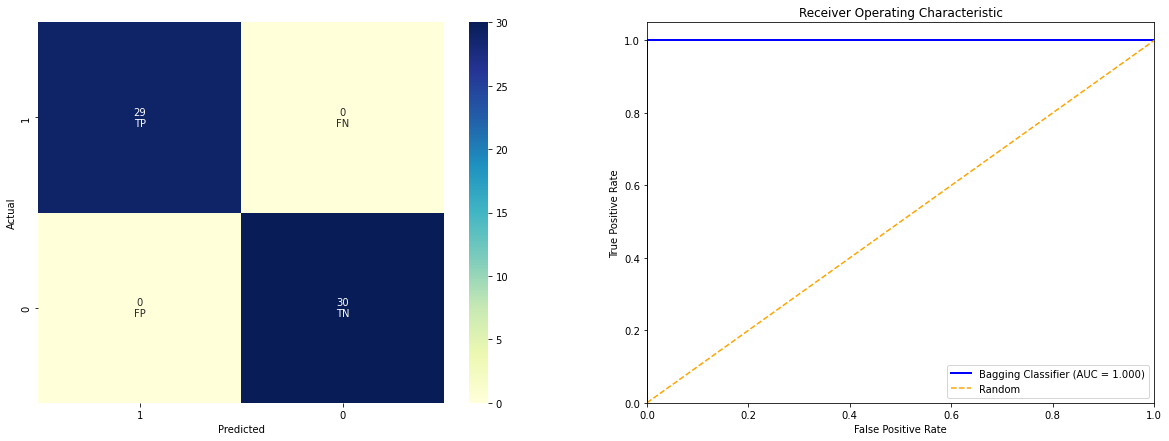

In [295]:
from sklearn.ensemble import BaggingClassifier

bcc = BaggingClassifier()

parkinsons_disease_pred("Bagging Classifier", bcc,X_train_etc, X_test_etc, y_train, y_test, plot=True)

# AdaBoosting


=== AdaBoost ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        30
           1       0.89      0.86      0.88        29

    accuracy                           0.88        59
   macro avg       0.88      0.88      0.88        59
weighted avg       0.88      0.88      0.88        59

Train Accuracy: 84.26%
Test Accuracy: 88.14%
Train RMSE: 0.3968
Test RMSE: 0.3444
Area under the curve: 0.955


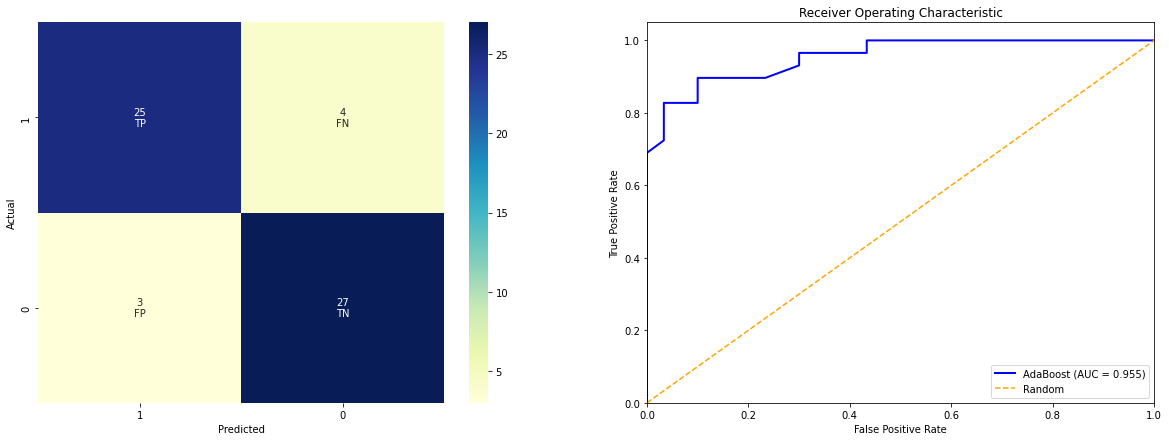

In [298]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoostClassifier using 'estimator' instead of 'base_estimator'
# Changed algorithm from 'SAMME.R' to 'SAMME' as per error message
abc = AdaBoostClassifier(estimator=None, learning_rate=0.06, algorithm='SAMME')

parkinsons_disease_pred("AdaBoost", abc,X_train_etc, X_test_etc, y_train, y_test, plot=True)




# Gradient Boosting


=== Gradient Boosting ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        29

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

Train Accuracy: 100.00%
Test Accuracy: 100.00%
Train RMSE: 0.0000
Test RMSE: 0.0000
Area under the curve: 1.000


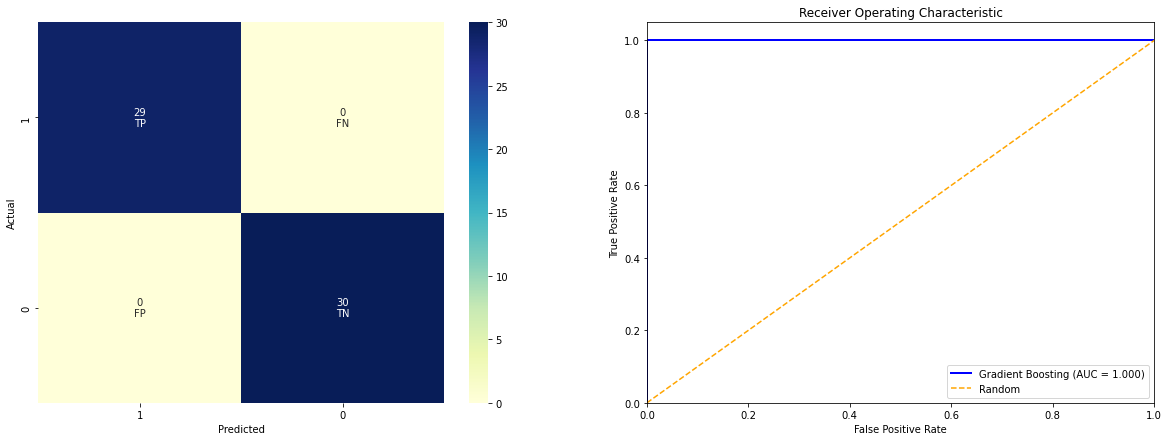

In [299]:
from sklearn.ensemble import GradientBoostingClassifier


gbc = GradientBoostingClassifier(random_state=42)


parkinsons_disease_pred("Gradient Boosting", gbc, X_train_etc, X_test_etc, y_train, y_test, plot=True)




# Logestic Regression


=== Logistic Regression ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        30
           1       0.89      0.86      0.88        29

    accuracy                           0.88        59
   macro avg       0.88      0.88      0.88        59
weighted avg       0.88      0.88      0.88        59

Train Accuracy: 86.38%
Test Accuracy: 88.14%
Train RMSE: 0.3690
Test RMSE: 0.3444
Area under the curve: 0.954


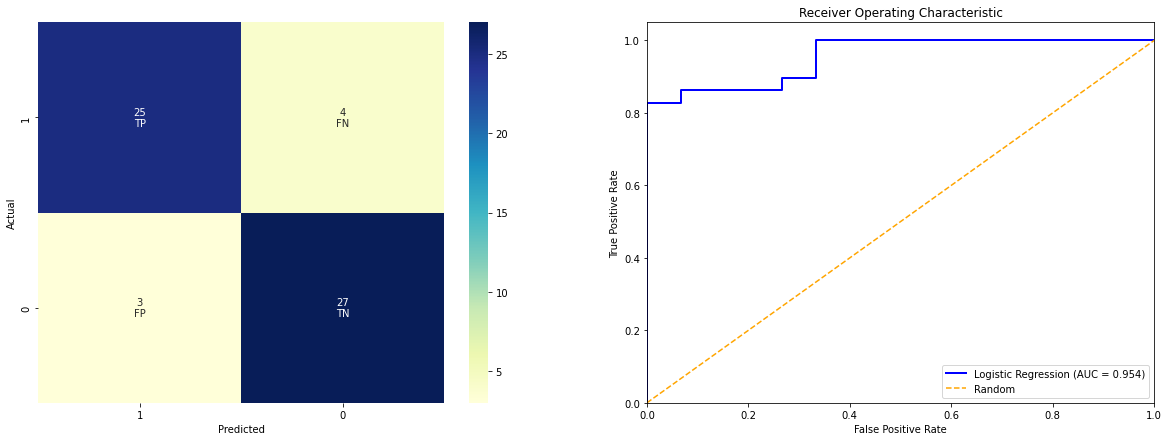

In [419]:
lr  = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, penalty="l1", solver='liblinear')

parkinsons_disease_pred("Logistic Regression", lr, X_train_etc, X_test_etc, y_train, y_test, plot = True)

# Naive Bayes


=== Gaussian Naïve Bayes ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       0.85      0.97      0.91        30
           1       0.96      0.83      0.89        29

    accuracy                           0.90        59
   macro avg       0.91      0.90      0.90        59
weighted avg       0.91      0.90      0.90        59

Train Accuracy: 81.28%
Test Accuracy: 89.83%
Train RMSE: 0.4327
Test RMSE: 0.3189
Area under the curve: 0.962


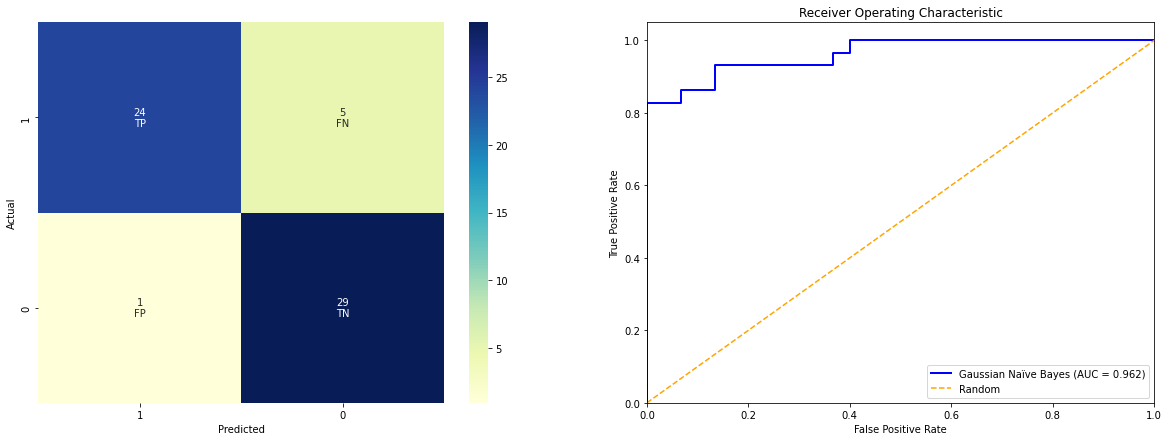

In [422]:
gnb = GaussianNB(priors=None, var_smoothing=1e-09)

parkinsons_disease_pred("Gaussian Naïve Bayes", gnb, X_train_etc, X_test_etc, y_train, y_test, plot=True)

# SVM


=== Support Vector Classifier ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        30
           1       0.93      0.86      0.89        29

    accuracy                           0.90        59
   macro avg       0.90      0.90      0.90        59
weighted avg       0.90      0.90      0.90        59

Train Accuracy: 88.51%
Test Accuracy: 89.83%
Train RMSE: 0.3390
Test RMSE: 0.3189
Area under the curve: 0.951


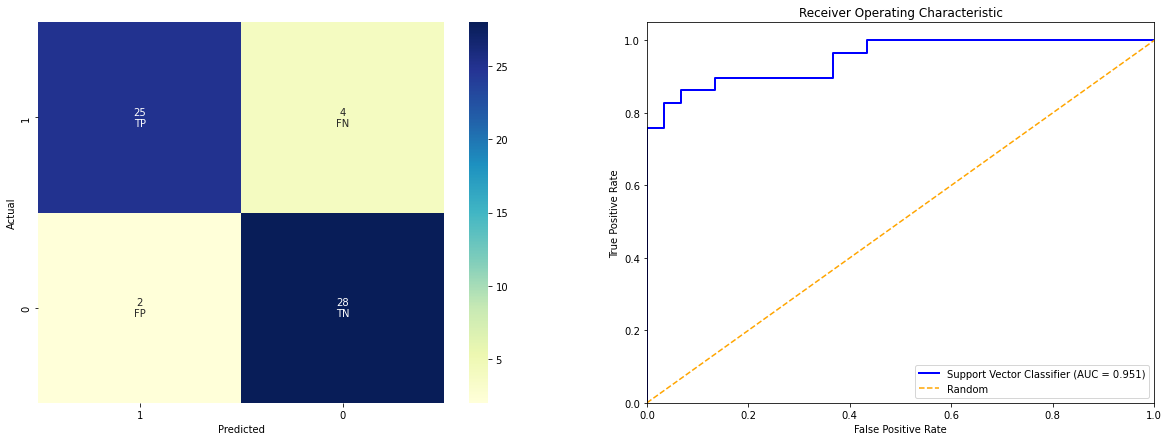

In [425]:
svc = SVC(C=1.0, kernel='linear', degree= 2, gamma=1.0, random_state=None,
          coef0=0.0, shrinking=True, probability=True,tol=0.001,
          cache_size=200, class_weight=None, verbose=False,max_iter= -1)


parkinsons_disease_pred("Support Vector Classifier", svc,  X_train_etc, X_test_etc, y_train, y_test, plot=True)

# Correlation Matrix feature selection

In [416]:
# --- c: Correlation Matrix feature selection (top 11 features) ---
# Calculate correlation matrix including target
corr_matrix = pd.concat([x_train, y_train], axis=1).corr()

# Get absolute correlation values of features with the target variable
target_corr = abs(corr_matrix[y_train.name]).sort_values(ascending=False)

# Select top 11 features excluding the target itself
top_corr_features = target_corr.index[1:12]

X_train_corr = x_train[top_corr_features]
X_test_corr = x_test[top_corr_features]



# Concatenate selected features with target for correlation computation
corr_data = pd.concat([X_train_corr, y_train], axis=1)

# Compute correlation matrix
correlation_matrix = corr_data.corr()

# Extract correlation of each feature with the target variable
target_correlation = correlation_matrix[y_train.name].drop(labels=[y_train.name])  # exclude target itself

# Create DataFrame with feature and absolute correlation value
feature_corr_df = pd.DataFrame({
    'Feature': target_correlation.index,
    'Correlation with Target': target_correlation.values,
    'Absolute Correlation': target_correlation.abs().values
}).sort_values(by='Absolute Correlation', ascending=False)

# Display
print("\nFeature correlations with target (Correlation Matrix method):\n")
print(feature_corr_df.to_string(index=False))



Feature correlations with target (Correlation Matrix method):

        Feature  Correlation with Target  Absolute Correlation
        spread1                 0.642451              0.642451
            ppe                 0.616987              0.616987
        spread2                 0.513479              0.513479
       mdvp_apq                 0.473190              0.473190
   mdvp_shimmer                 0.472575              0.472575
   shimmer_apq5                 0.457208              0.457208
mdvp_shimmer_db                 0.451292              0.451292
   shimmer_apq3                 0.446731              0.446731
    shimmer_dda                 0.446711              0.446711
             d2                 0.444010              0.444010
            hnr                -0.430945              0.430945


# Training on Corelation Matrix

In [306]:
conf_matrix_all = {}

def parkinsons_disease_pred(name, algo, training_x, testing_x, training_y, testing_y, plot):
    algo.fit(training_x, training_y)

    # Predictions and Probabilities
    train_preds = algo.predict(training_x)
    predictions = algo.predict(testing_x)
    probabilities = algo.predict_proba(testing_x)

    # Confusion Matrix
    conf_matrix = confusion_matrix(testing_y, predictions)
    conf_matrix_all[name] = conf_matrix

    # Classification Report
    print(f"\n=== {name} ===")
    print("Classification report (Test data):")
    print(classification_report(testing_y, predictions))

    # Metrics
    train_acc = accuracy_score(training_y, train_preds)
    test_acc = accuracy_score(testing_y, predictions)
    train_rmse = math.sqrt(mean_squared_error(training_y, train_preds))
    test_rmse = math.sqrt(mean_squared_error(testing_y, predictions))
    auc = roc_auc_score(testing_y, probabilities[:, 1])

    print(f"Train Accuracy: {train_acc * 100:.2f}%")
    print(f"Test Accuracy: {test_acc * 100:.2f}%")
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Area under the curve: {auc:.3f}")

    # ROC Curve Data
    fpr, tpr, thresholds = roc_curve(testing_y, probabilities[:, 1])

    if plot:
        fig, axes = plt.subplots(1, 2, figsize=(20, 7))

        # Confusion Matrix Plot
        conf_matrix_flipped = np.flip(conf_matrix)
        labels = np.array([['\nTP', '\nFN'], ['\nFP', '\nTN']])
        labels = np.core.defchararray.add(conf_matrix_flipped.astype(str), labels)
        sns.heatmap(conf_matrix_flipped, fmt='', annot=labels, ax=axes[0], cmap="YlGnBu", xticklabels=[1, 0], yticklabels=[1, 0])
        axes[0].set(xlabel='Predicted', ylabel='Actual')

        # ROC Curve Plot - FIXED
        axes[1].plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})', color='blue', lw=2)
        axes[1].plot([0, 1], [0, 1], linestyle='--', color='orange', label='Random')
        axes[1].set_xlim([0.0, 1.0])
        axes[1].set_ylim([0.0, 1.05])
        axes[1].set_xlabel('False Positive Rate')
        axes[1].set_ylabel('True Positive Rate')
        axes[1].set_title('Receiver Operating Characteristic')
        axes[1].legend(loc='lower right')

        plt.show()


# Random Forest


=== Random Forest ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.93      0.96        29

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59

Train Accuracy: 97.87%
Test Accuracy: 96.61%
Train RMSE: 0.1459
Test RMSE: 0.1841
Area under the curve: 0.995


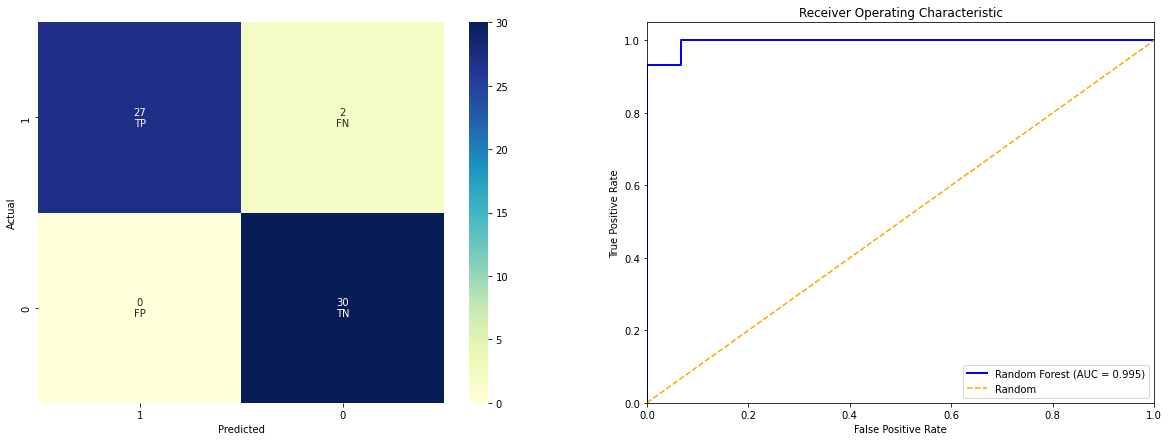

In [312]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier with max_features='sqrt'
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, criterion="gini",
                             min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                             max_features='sqrt',  # Changed 'auto' to 'sqrt'
                             max_leaf_nodes=None, min_impurity_decrease=0.0,
                             bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0,
                             warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)


#rfc = RandomForestClassifier()


parkinsons_disease_pred("Random Forest", rfc, X_train_corr, X_test_corr,  y_train, y_test, plot=True)


# KNN


=== K-Nearest Neighbours ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.97      0.98        29

    accuracy                           0.98        59
   macro avg       0.98      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59

Train Accuracy: 93.19%
Test Accuracy: 98.31%
Train RMSE: 0.2609
Test RMSE: 0.1302
Area under the curve: 0.997


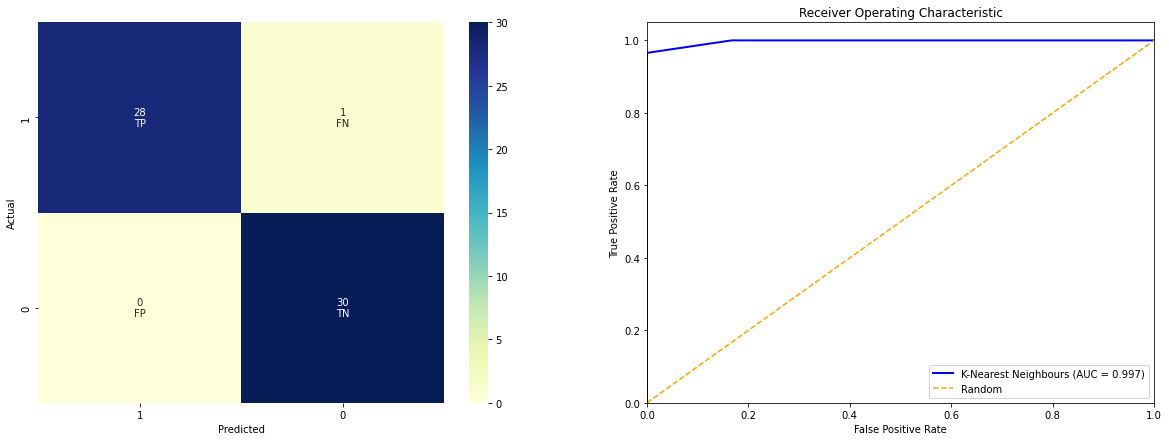

In [314]:
knn = KNeighborsClassifier( metric='manhattan',  n_neighbors = 3)

parkinsons_disease_pred("K-Nearest Neighbours", knn, X_train_corr, X_test_corr, y_train, y_test, plot=True)

# Decision Tree


=== Decision Tree ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       0.86      0.83      0.85        30
           1       0.83      0.86      0.85        29

    accuracy                           0.85        59
   macro avg       0.85      0.85      0.85        59
weighted avg       0.85      0.85      0.85        59

Train Accuracy: 100.00%
Test Accuracy: 84.75%
Train RMSE: 0.0000
Test RMSE: 0.3906
Area under the curve: 0.848


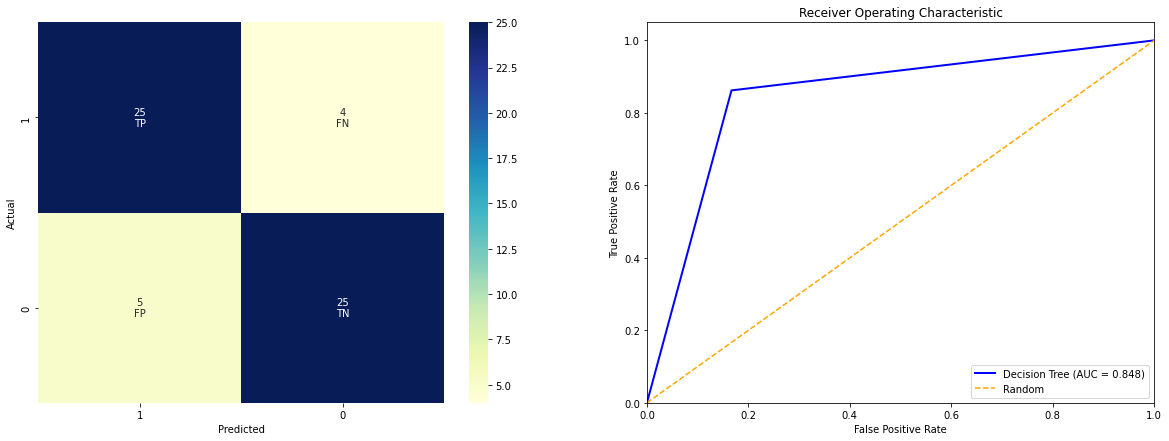

In [315]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier with common parameters
"""dtc = DecisionTreeClassifier(criterion='gini',        # or 'entropy'
                             max_depth=None,          # or set to a value like 5
                             min_samples_split=2,
                             min_samples_leaf=1,
                             random_state=0) """



dtc = DecisionTreeClassifier()


# Run the prediction and evaluation
parkinsons_disease_pred("Decision Tree", dtc, X_train_corr, X_test_corr, y_train, y_test, plot=True)


# Bagging


=== Bagging Classifier ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       0.97      0.97      0.97        29

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59

Train Accuracy: 99.57%
Test Accuracy: 96.61%
Train RMSE: 0.0652
Test RMSE: 0.1841
Area under the curve: 0.998


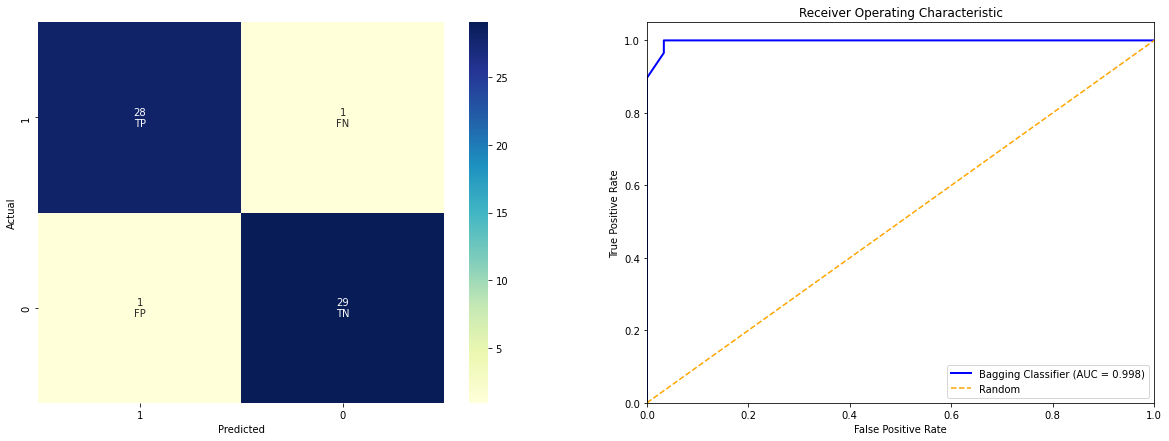

In [328]:
from sklearn.ensemble import BaggingClassifier

bcc = BaggingClassifier()

parkinsons_disease_pred("Bagging Classifier", bcc,X_train_corr, X_test_corr, y_train, y_test, plot=True)

# AdaBoosting


=== AdaBoost ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       0.74      0.97      0.84        30
           1       0.95      0.66      0.78        29

    accuracy                           0.81        59
   macro avg       0.85      0.81      0.81        59
weighted avg       0.85      0.81      0.81        59

Train Accuracy: 79.57%
Test Accuracy: 81.36%
Train RMSE: 0.4519
Test RMSE: 0.4318
Area under the curve: 0.920


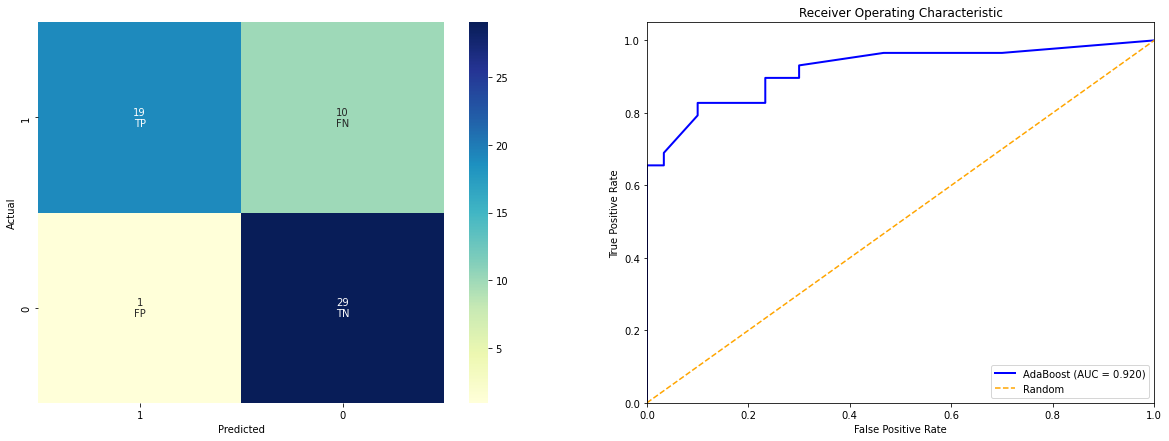

In [322]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoostClassifier using 'estimator' instead of 'base_estimator'
# Changed algorithm from 'SAMME.R' to 'SAMME' as per error message
abc = AdaBoostClassifier(estimator=None, learning_rate=0.06, algorithm='SAMME')

parkinsons_disease_pred("AdaBoost", abc,X_train_corr, X_test_corr, y_train, y_test, plot=True)




# Gradient Boosting


=== Gradient Boosting ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.93      0.96        29

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59

Train Accuracy: 100.00%
Test Accuracy: 96.61%
Train RMSE: 0.0000
Test RMSE: 0.1841
Area under the curve: 0.998


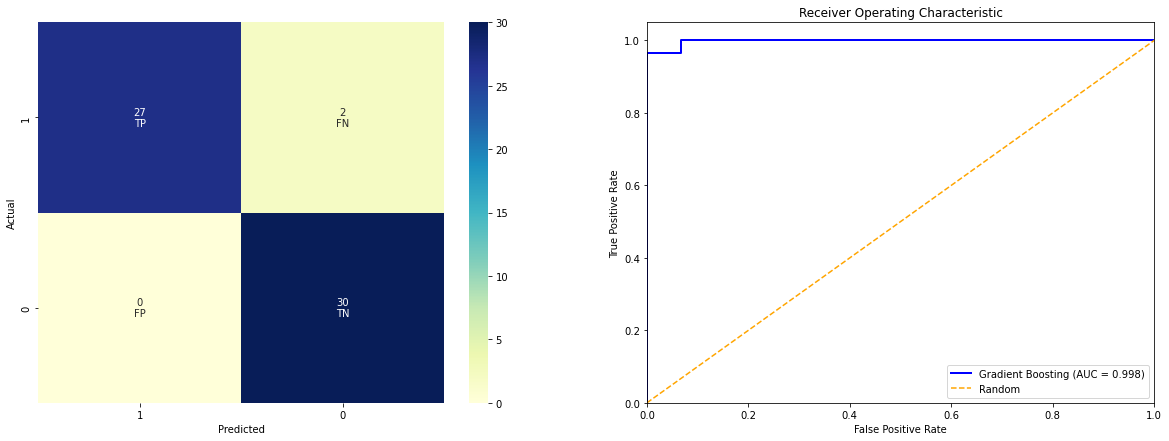

In [326]:
from sklearn.ensemble import GradientBoostingClassifier


gbc = GradientBoostingClassifier(random_state=42)


parkinsons_disease_pred("Gradient Boosting", gbc,X_train_corr, X_test_corr, y_train, y_test, plot=True)




# Logestic Regression


=== Logistic Regression ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       0.86      0.83      0.85        30
           1       0.83      0.86      0.85        29

    accuracy                           0.85        59
   macro avg       0.85      0.85      0.85        59
weighted avg       0.85      0.85      0.85        59

Train Accuracy: 83.40%
Test Accuracy: 84.75%
Train RMSE: 0.4074
Test RMSE: 0.3906
Area under the curve: 0.947


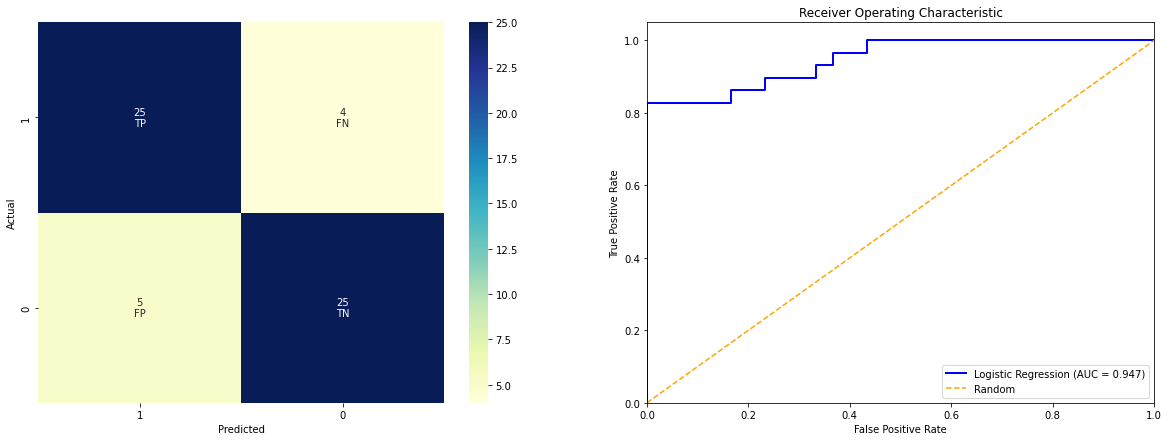

In [420]:
lr  = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, penalty="l1", solver='liblinear')

parkinsons_disease_pred("Logistic Regression", lr, X_train_corr, X_test_corr, y_train, y_test, plot = True)

# Naive Bayes


=== Gaussian Naïve Bayes ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        30
           1       1.00      0.72      0.84        29

    accuracy                           0.86        59
   macro avg       0.89      0.86      0.86        59
weighted avg       0.89      0.86      0.86        59

Train Accuracy: 80.00%
Test Accuracy: 86.44%
Train RMSE: 0.4472
Test RMSE: 0.3682
Area under the curve: 0.974


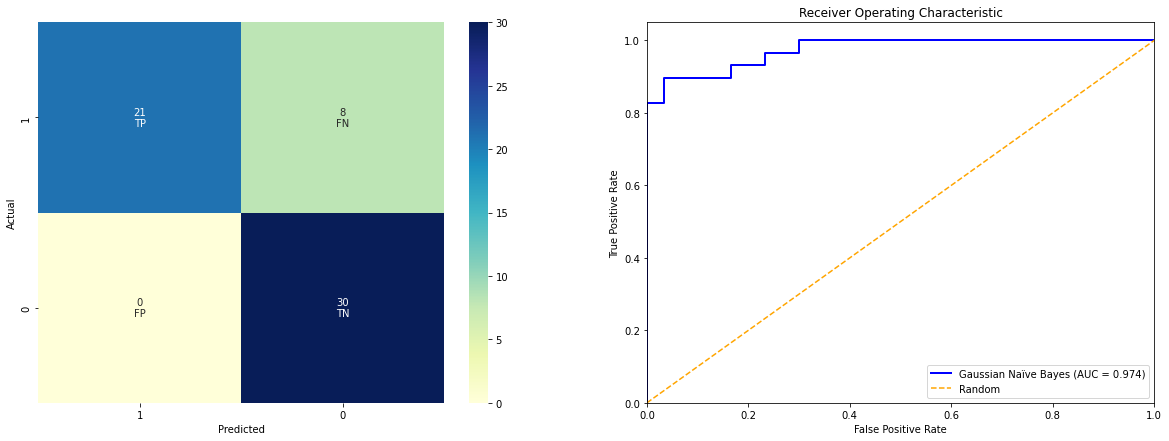

In [423]:
gnb = GaussianNB(priors=None, var_smoothing=1e-09)

parkinsons_disease_pred("Gaussian Naïve Bayes", gnb, X_train_corr, X_test_corr, y_train, y_test, plot=True)

# SVM


=== Support Vector Classifier ===
Classification report (Test data):
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        30
           1       0.86      0.86      0.86        29

    accuracy                           0.86        59
   macro avg       0.86      0.86      0.86        59
weighted avg       0.86      0.86      0.86        59

Train Accuracy: 82.55%
Test Accuracy: 86.44%
Train RMSE: 0.4177
Test RMSE: 0.3682
Area under the curve: 0.928


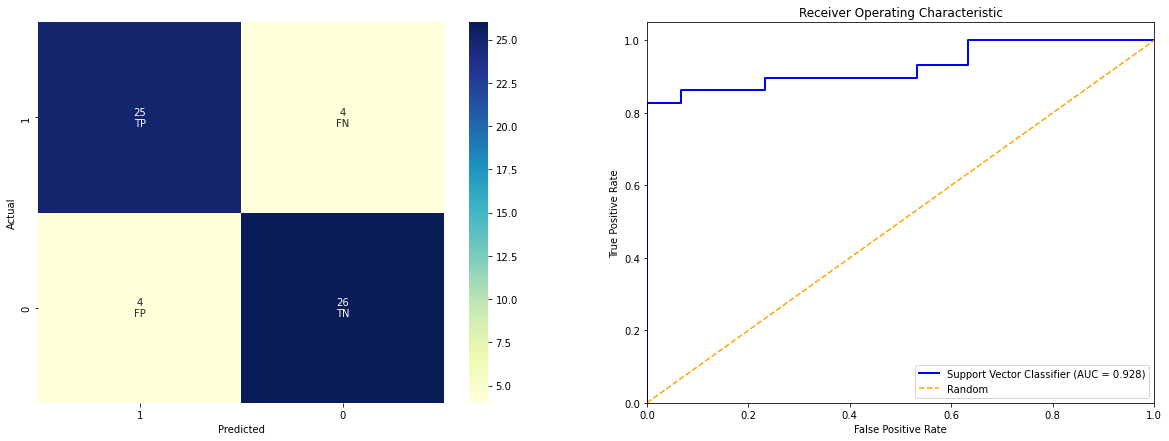

In [426]:
svc = SVC(C=1.0, kernel='linear', degree= 2, gamma=1.0, random_state=None,
          coef0=0.0, shrinking=True, probability=True,tol=0.001,
          cache_size=200, class_weight=None, verbose=False,max_iter= -1)


parkinsons_disease_pred("Support Vector Classifier", svc,  X_train_corr, X_test_corr, y_train, y_test, plot=True)

# K-Fold and Regularization

In [339]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

conf_matrix_all = {}

def parkinsons_disease_pred(name, algo, X, y, plot=True, k_folds=5):
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

    train_accuracies = []
    test_accuracies = []
    train_rmses = []
    test_rmses = []
    aucs = []

    final_fpr, final_tpr = None, None
    final_auc = 0
    final_conf_matrix = None

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
        print(f"\n--- Fold {fold} ---")
        x_train, x_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = clone(algo)
        model.fit(x_train, y_train)

        train_preds = model.predict(x_train)
        test_preds = model.predict(x_test)
        test_probs = model.predict_proba(x_test)[:, 1]

        # Metrics
        train_acc = accuracy_score(y_train, train_preds)
        test_acc = accuracy_score(y_test, test_preds)
        train_rmse = math.sqrt(mean_squared_error(y_train, train_preds))
        test_rmse = math.sqrt(mean_squared_error(y_test, test_preds))
        auc = roc_auc_score(y_test, test_probs)

        # Accumulate scores
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)
        train_rmses.append(train_rmse)
        test_rmses.append(test_rmse)
        aucs.append(auc)

        # Save last fold data for plotting
        if fold == k_folds:
            final_fpr, final_tpr, _ = roc_curve(y_test, test_probs)
            final_auc = auc
            final_conf_matrix = confusion_matrix(y_test, test_preds)
            conf_matrix_all[name] = final_conf_matrix

    # Report average results
    print(f"\n=== {name} - {k_folds}-Fold Cross Validation ===")
    print(f"Average Train Accuracy: {np.mean(train_accuracies) * 100:.2f}%")
    print(f"Average Test Accuracy: {np.mean(test_accuracies) * 100:.2f}%")
    print(f"Average Train RMSE: {np.mean(train_rmses):.4f}")
    print(f"Average Test RMSE: {np.mean(test_rmses):.4f}")
    print(f"Average AUC: {np.mean(aucs):.4f}")

    # Plot ROC and confusion matrix for final fold
    if plot:
        fig, axes = plt.subplots(1, 2, figsize=(20, 7))

        # Confusion matrix
        cm = np.flip(final_conf_matrix)
        labels = np.array([['\nTP', '\nFN'], ['\nFP', '\nTN']])
        labels = np.core.defchararray.add(cm.astype(str), labels)
        sns.heatmap(cm, fmt='', annot=labels, ax=axes[0], cmap="YlGnBu", xticklabels=[1, 0], yticklabels=[1, 0])
        axes[0].set(xlabel='Predicted', ylabel='Actual')

        # ROC curve
        axes[1].plot(final_fpr, final_tpr, label=f'{name} (AUC = {final_auc:.3f})', color='blue', lw=2)
        axes[1].plot([0, 1], [0, 1], linestyle='--', color='orange', label='Random')
        axes[1].set_xlim([0.0, 1.0])
        axes[1].set_ylim([0.0, 1.05])
        axes[1].set_xlabel('False Positive Rate')
        axes[1].set_ylabel('True Positive Rate')
        axes[1].set_title('Receiver Operating Characteristic')
        axes[1].legend(loc='lower right')

        plt.show()


In [340]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

log_reg = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')  # L2 regularization
decision_tree = DecisionTreeClassifier(max_depth=3, min_samples_split=5)  # Regularized tree



--- Fold 1 ---

--- Fold 2 ---

--- Fold 3 ---

--- Fold 4 ---

--- Fold 5 ---

=== Logistic Regression - 5-Fold Cross Validation ===
Average Train Accuracy: 84.27%
Average Test Accuracy: 81.62%
Average Train RMSE: 0.3965
Average Test RMSE: 0.4252
Average AUC: 0.9101


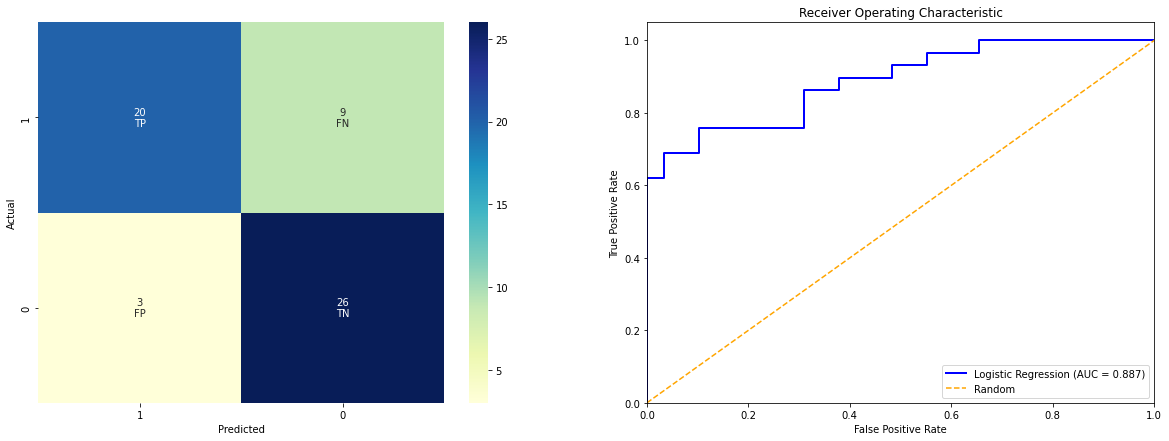


--- Fold 1 ---

--- Fold 2 ---

--- Fold 3 ---

--- Fold 4 ---

--- Fold 5 ---

=== Decision Tree - 5-Fold Cross Validation ===
Average Train Accuracy: 93.28%
Average Test Accuracy: 87.42%
Average Train RMSE: 0.2557
Average Test RMSE: 0.3515
Average AUC: 0.8947


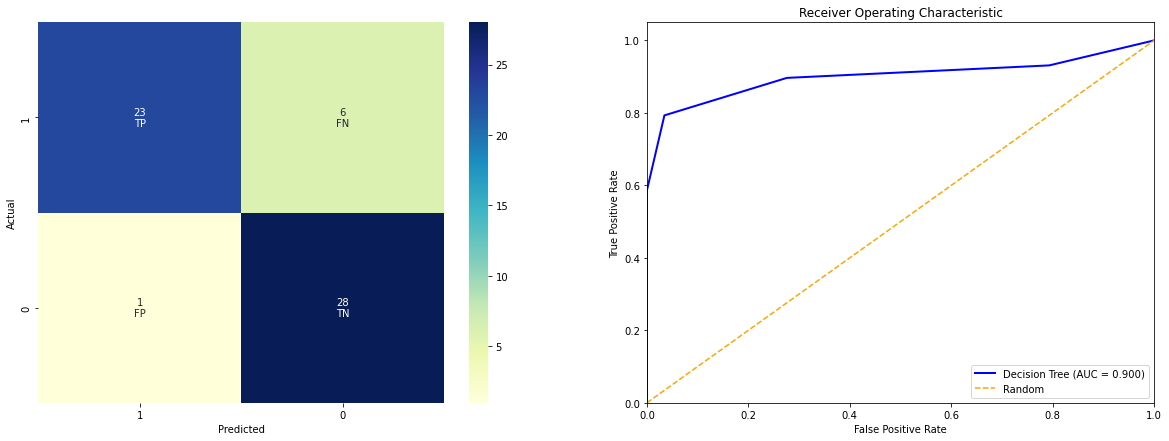

In [341]:
parkinsons_disease_pred("Logistic Regression", log_reg, X, y)
parkinsons_disease_pred("Decision Tree", decision_tree, X, y)



--- Fold 1 ---

--- Fold 2 ---

--- Fold 3 ---

--- Fold 4 ---

--- Fold 5 ---

=== XGBOOST - 5-Fold Cross Validation ===
Average Train Accuracy: 99.75%
Average Test Accuracy: 94.23%
Average Train RMSE: 0.0391
Average Test RMSE: 0.2318
Average AUC: 0.9865


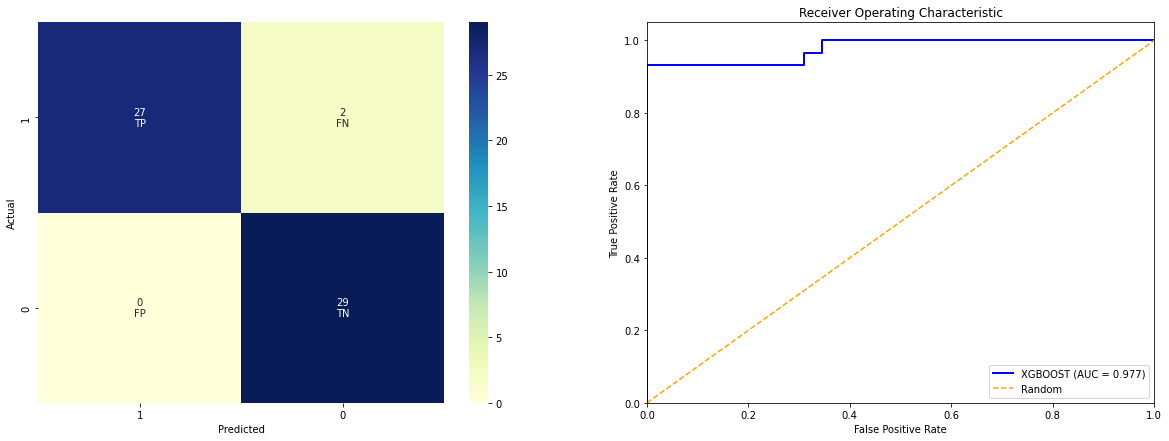

In [342]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.05,
                     eval_metric='auc',
                    use_label_encoder=False)

# Add eval_set in `.fit()` if needed
parkinsons_disease_pred("XGBOOST", xgb, X, y)



--- Fold 1 ---

--- Fold 2 ---

--- Fold 3 ---

--- Fold 4 ---

--- Fold 5 ---

=== Bagging Classifier - 5-Fold Cross Validation ===
Average Train Accuracy: 99.40%
Average Test Accuracy: 92.17%
Average Train RMSE: 0.0760
Average Test RMSE: 0.2733
Average AUC: 0.9777


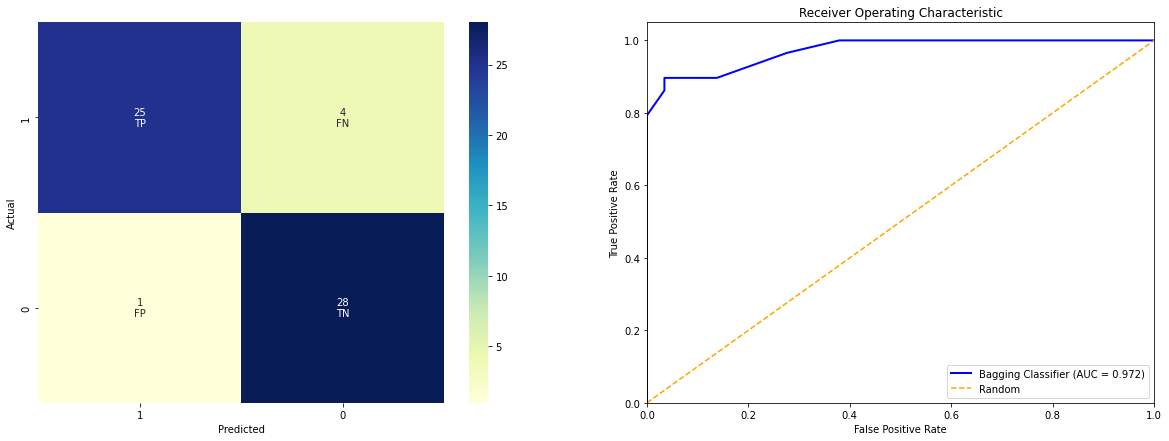

In [343]:

from sklearn.ensemble import BaggingClassifier

bcc = BaggingClassifier()

parkinsons_disease_pred("Bagging Classifier", bcc, X, y)